# Phase 2 Project : Introduction


In [ ]:
#The dataset describes the sale of individual residential property in King County from 2014 to 2015.
#This dataset contains 21 variables and 21613 observations involved in assessing home values.
#The goal is to develop a model that can predict house sale prices as accurately as possible. 
#A multivariate linear regression model will be used.

In [ ]:
#Import necessary libraries and load 'kc_house_data.csv' as a pandas dataframe

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [45]:
plt.style.use('seaborn')
df = pd.read_csv('kc_house_data.csv')





# Data Understanding

In [25]:
df.shape

(21613, 21)

In [44]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [26]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [27]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21611.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.128162,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Data Preparation

In [ ]:
#Fill Two Missing values in sqft_above with the mean value

In [246]:
df['sqft_above'].fillna(1788, inplace=True)

In [247]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
renovated        0
dtype: int64

#Some rows have a '?' value in sqft_basement. We will convert those into the mean of the column.

In [277]:
sqft_basement_df = df.loc[df['sqft_basement'] != '?']
sqft_basement_df['sqft_basement'] = sqft_basement_df['sqft_basement'].astype(float)
sqft_basement_mean = sqft_basement_df['sqft_basement'].mean()

In [278]:
df[df['sqft_basement'] != '?']
df['sqft_basement'].replace('?', sqft_basement_mean, inplace = True)
df['sqft_basement'] = df['sqft_basement'].astype(float)

#Explore variables normality using histograms

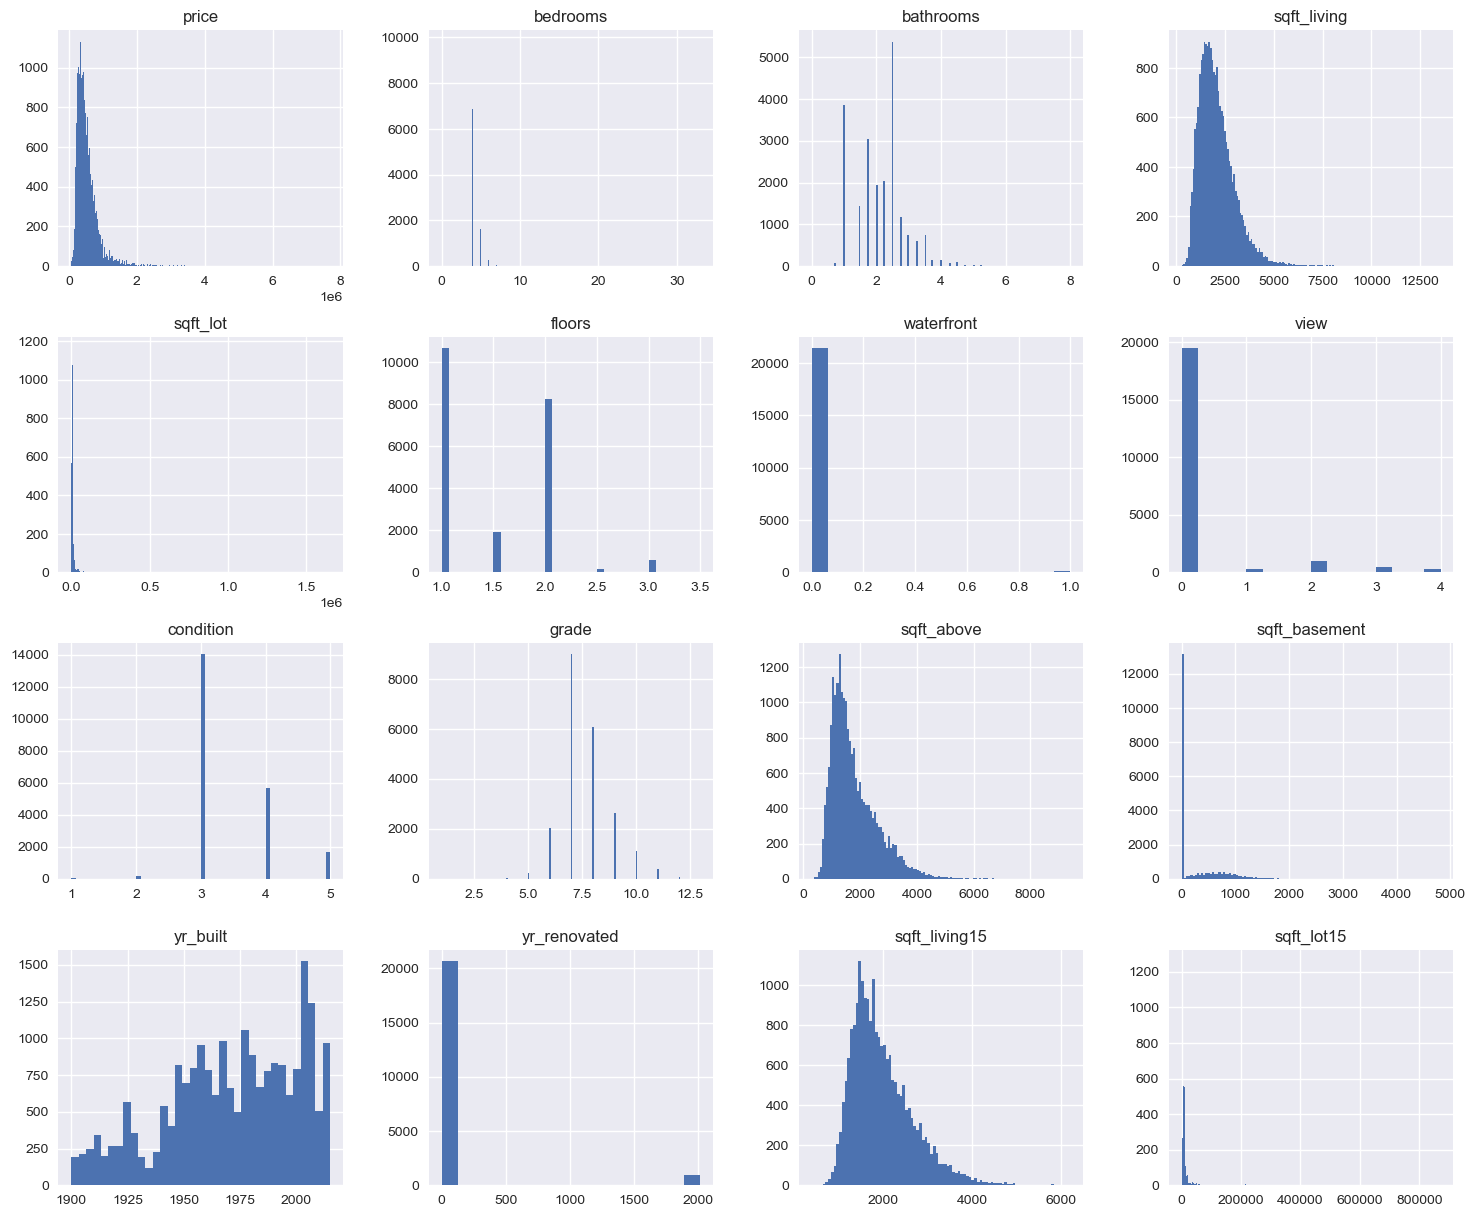

In [46]:
data.hist(figsize=(18,15), bins='auto');

In [ ]:
# From above histograms, price, sqft_living, sqft_above,sqft_living15 all appear to be continuous.
#They are not perfectly normal, but tend to follow an overall normal pattern

In [ ]:
#Use scatterplots to plot each predictor against the target variable

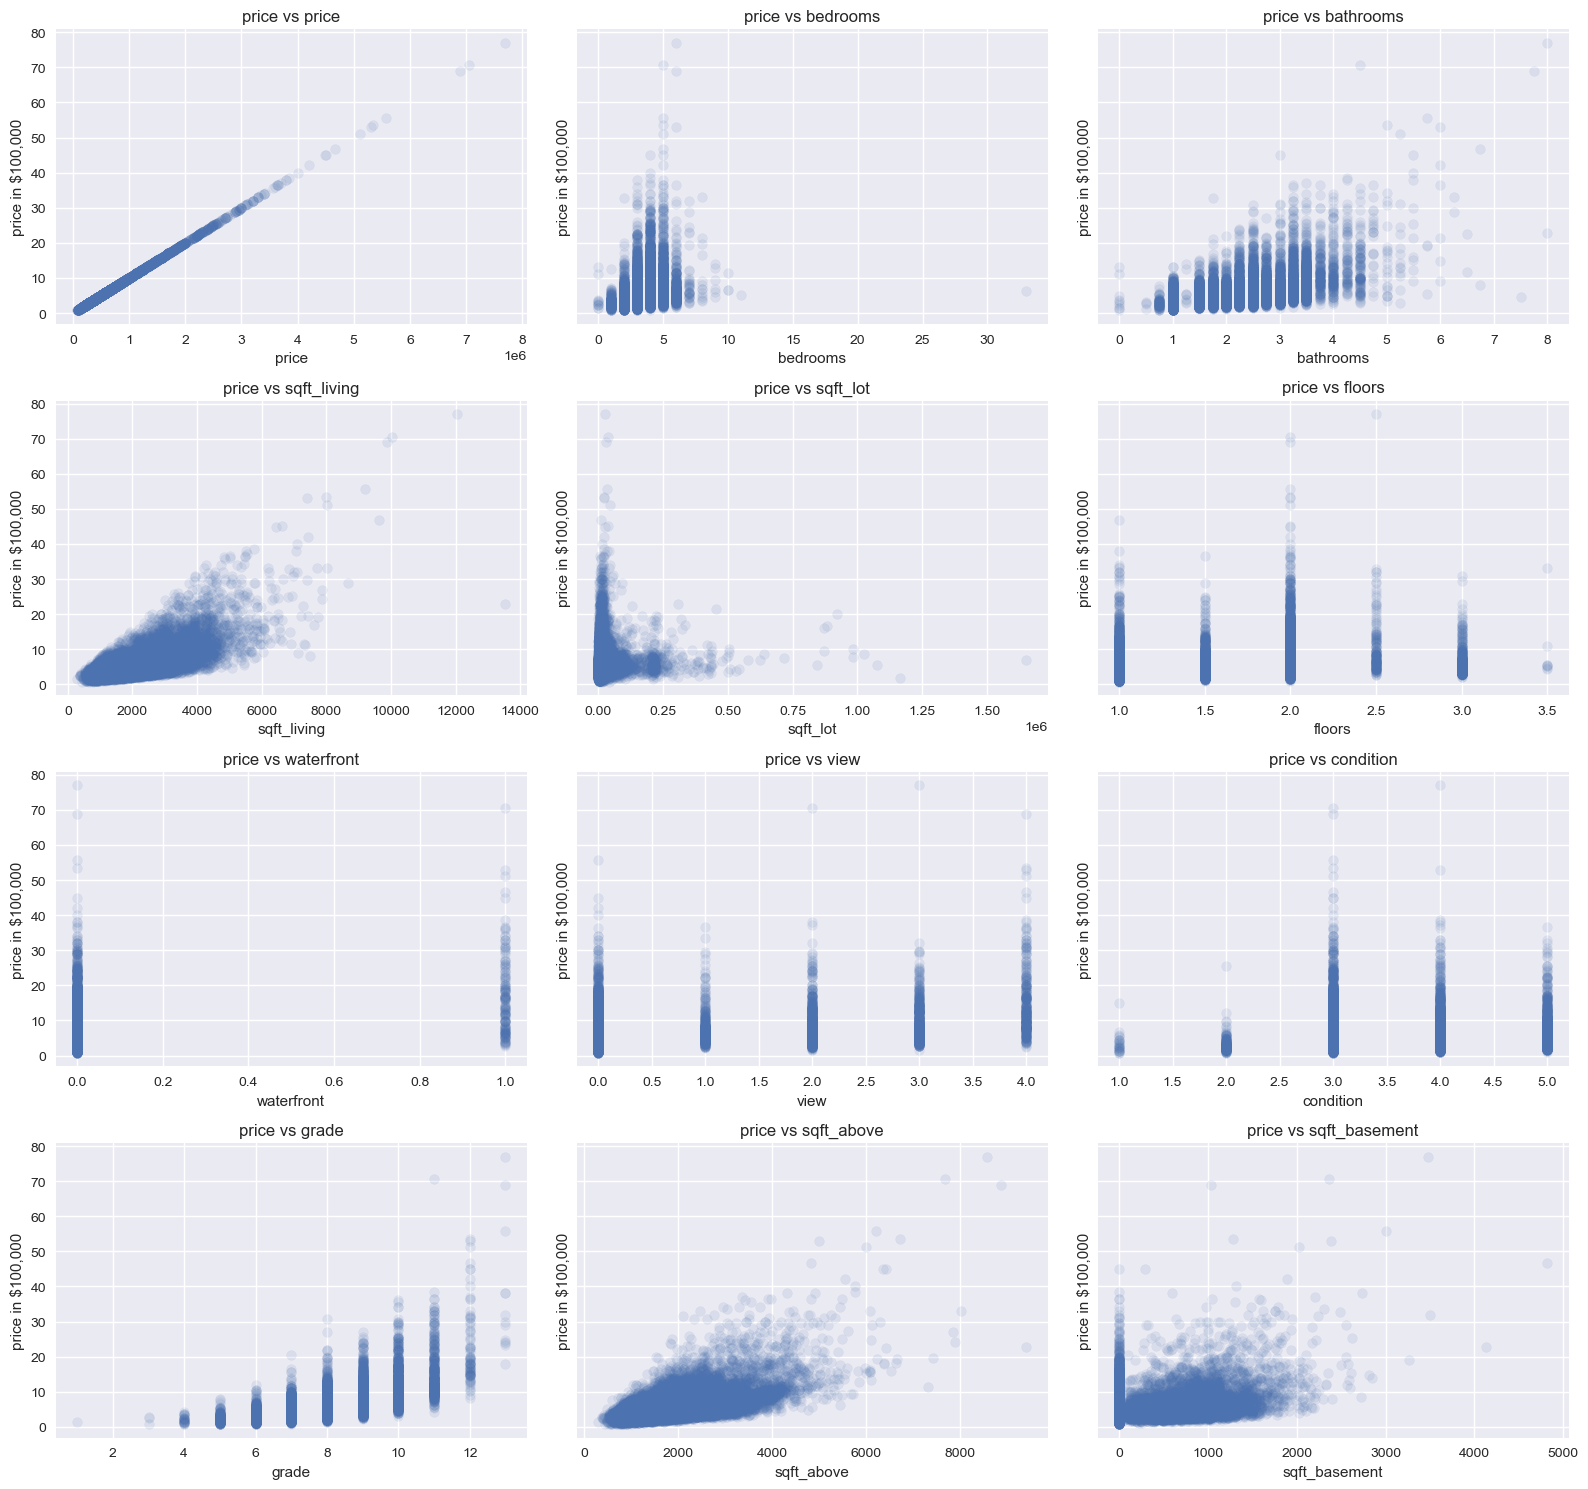

In [47]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), data.columns):
    ax.scatter(data[column], data['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('price in $100,000')

fig.tight_layout()

In [ ]:
#sqft_living, sqft_above and sqft_basement seem to have a linear relationship with price although the linearity is not perfect.
#the data needs pre-processing to improve results.

In [ ]:
#regression experiments between the chosen independent variables and the dependent variable (price)
#Residuals plotted using sm.graphics.plot_regress_exog()
#Q-Q plot done for regression residuals normality test

In [48]:
# import libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

Regression Analysis and Diagnostics for price~price
-------------------------------------------------------------------------------------
eval_env: 1


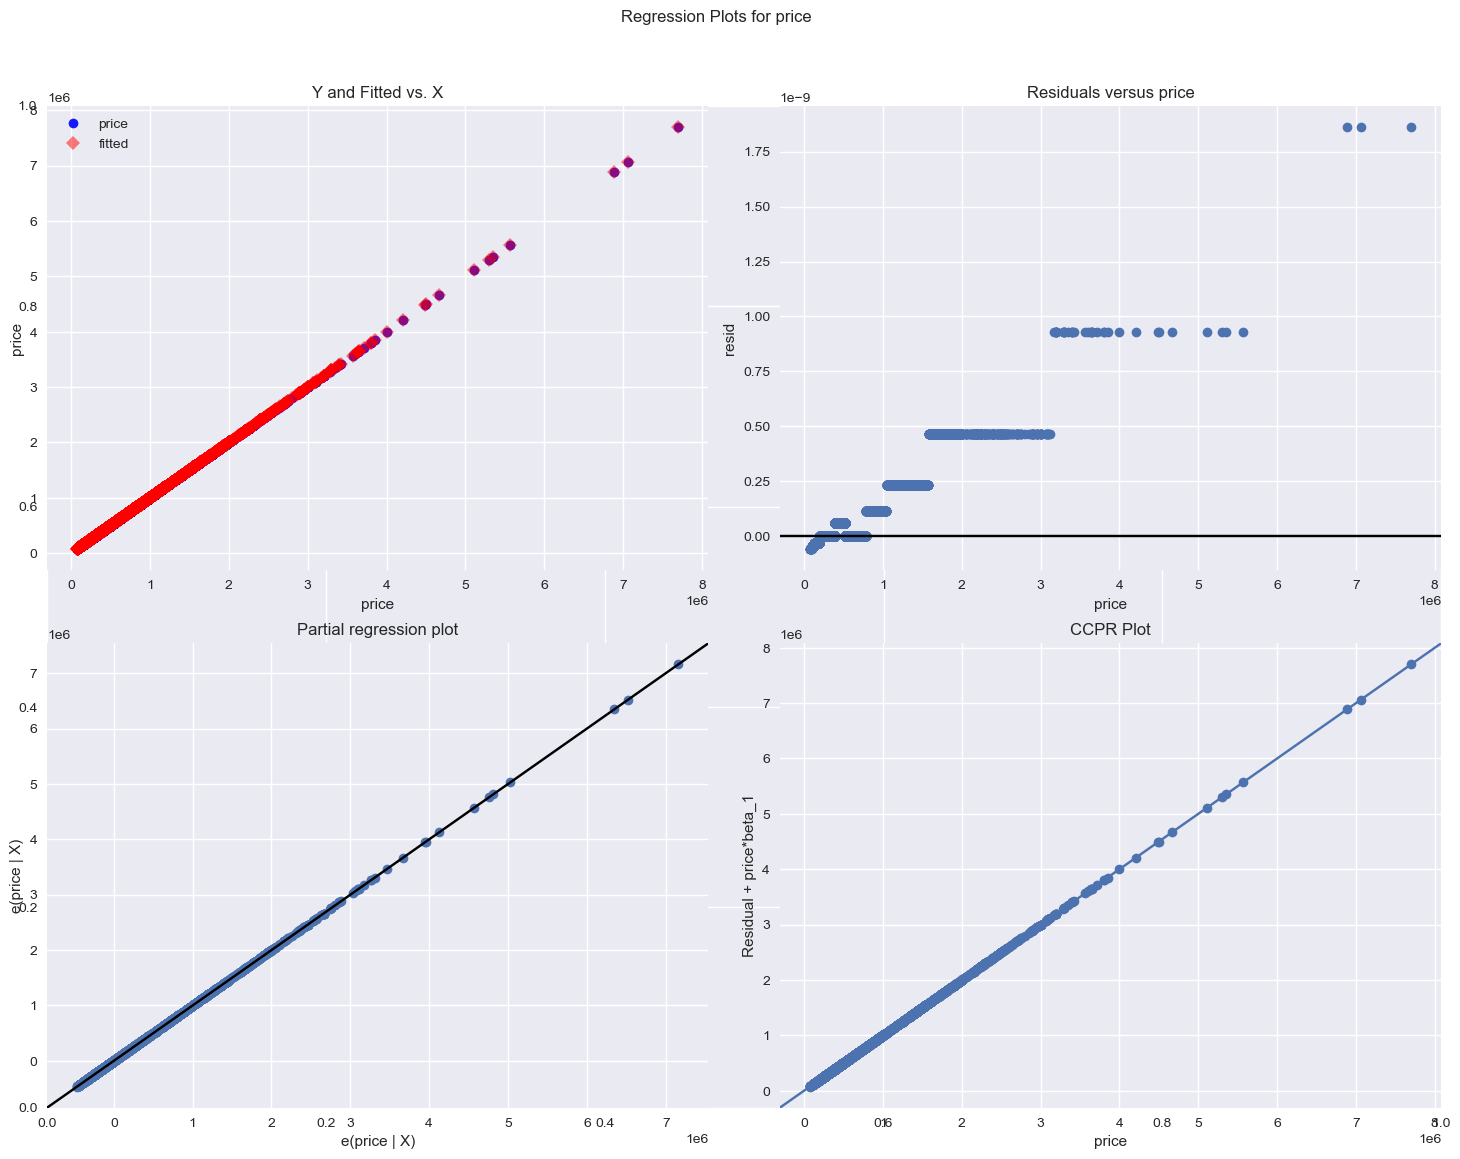

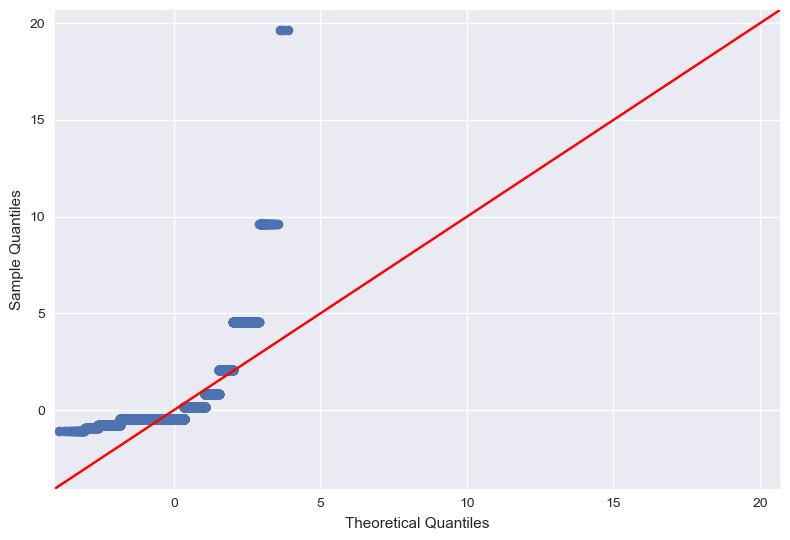

Regression Analysis and Diagnostics for price~bedrooms
-------------------------------------------------------------------------------------
eval_env: 1


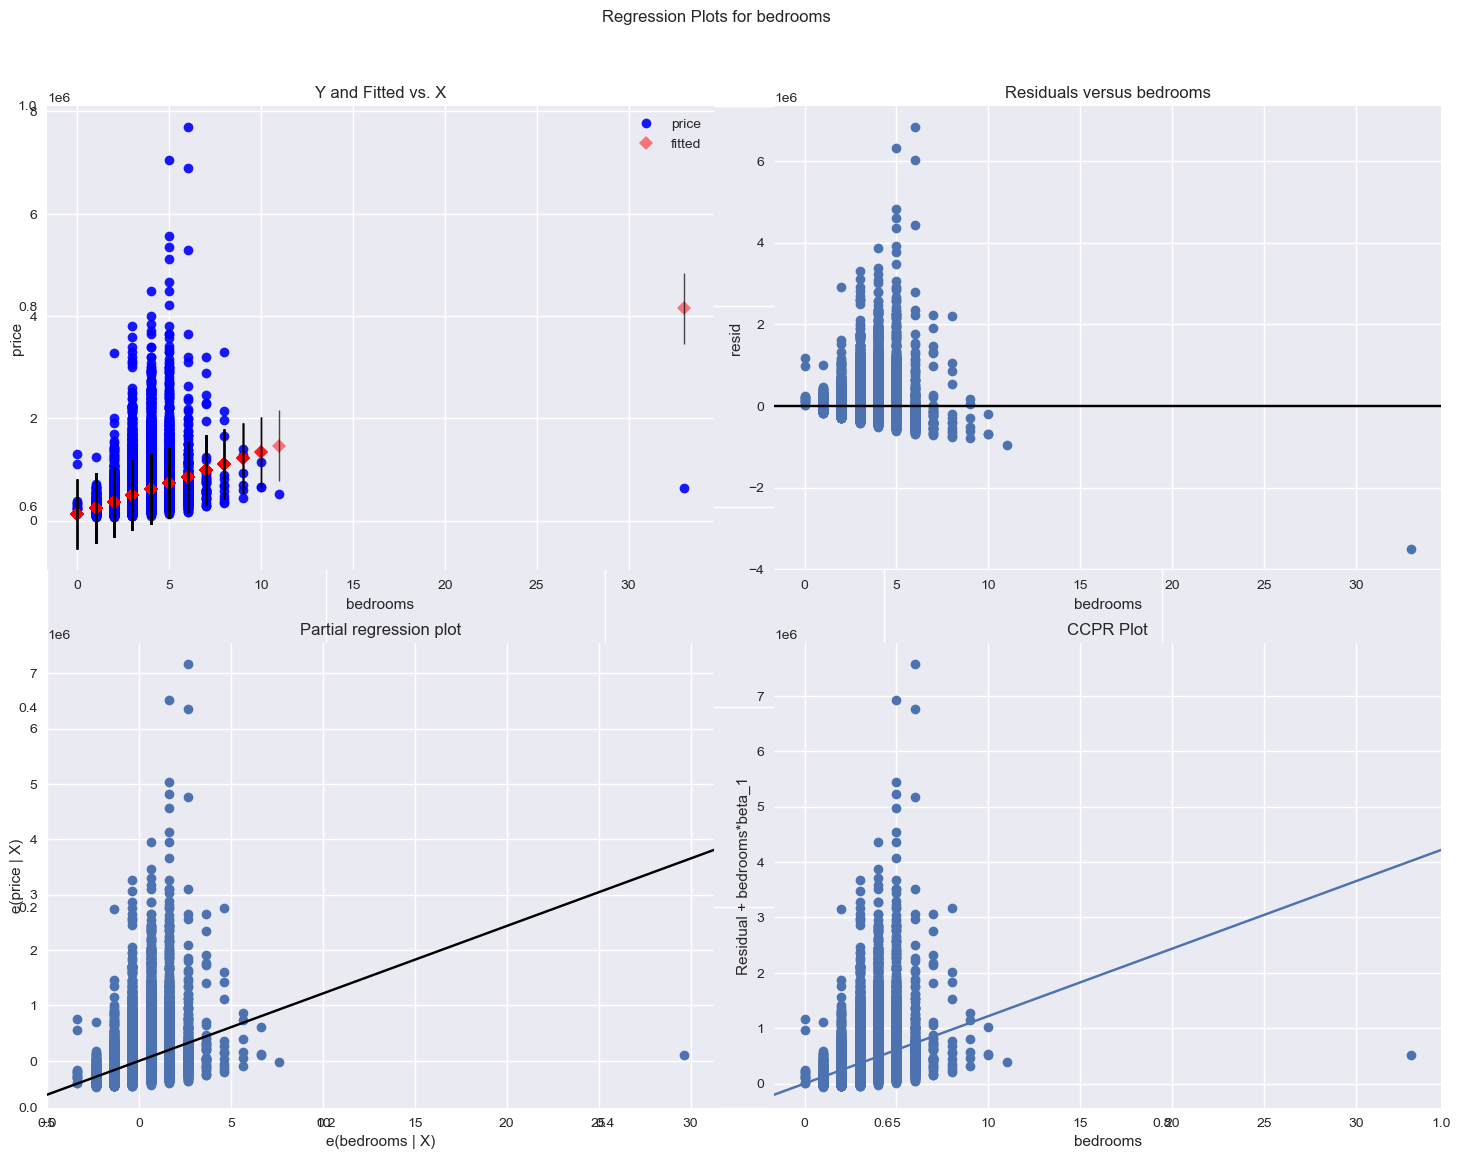

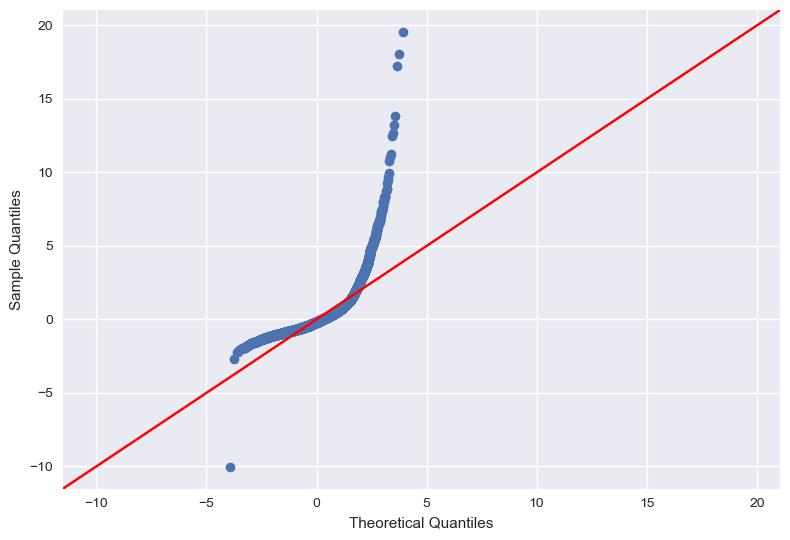

Regression Analysis and Diagnostics for price~bathrooms
-------------------------------------------------------------------------------------
eval_env: 1


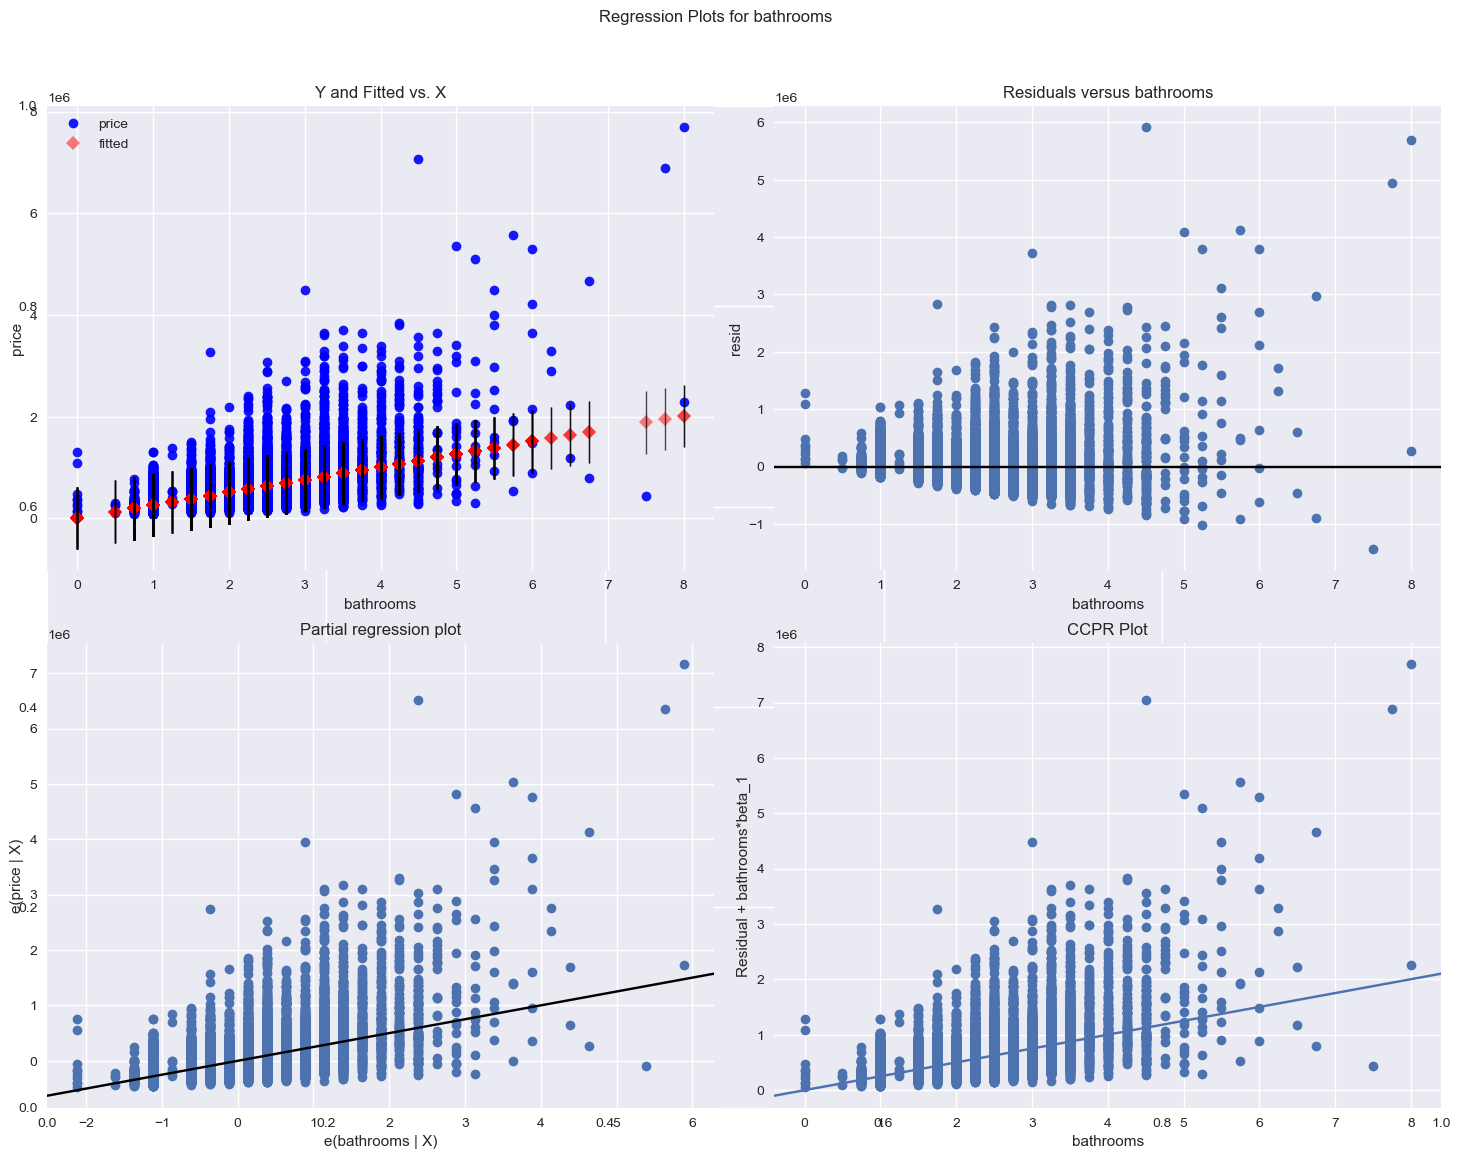

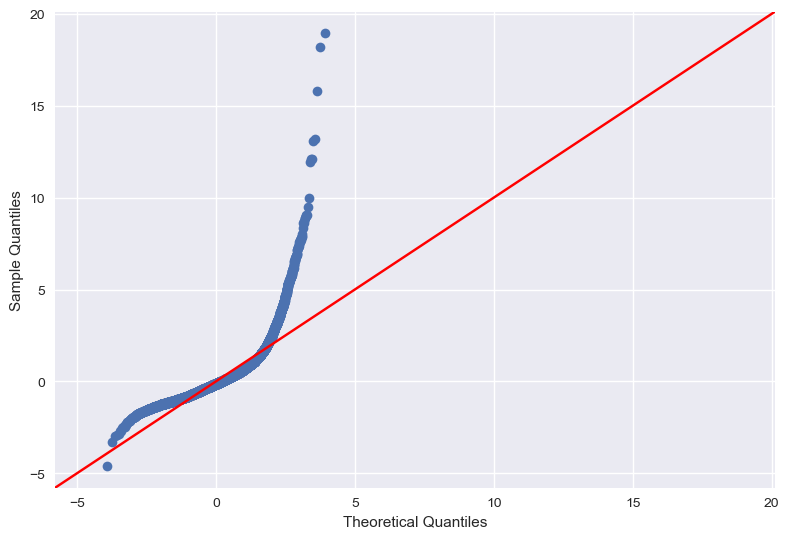

Regression Analysis and Diagnostics for price~sqft_living
-------------------------------------------------------------------------------------
eval_env: 1


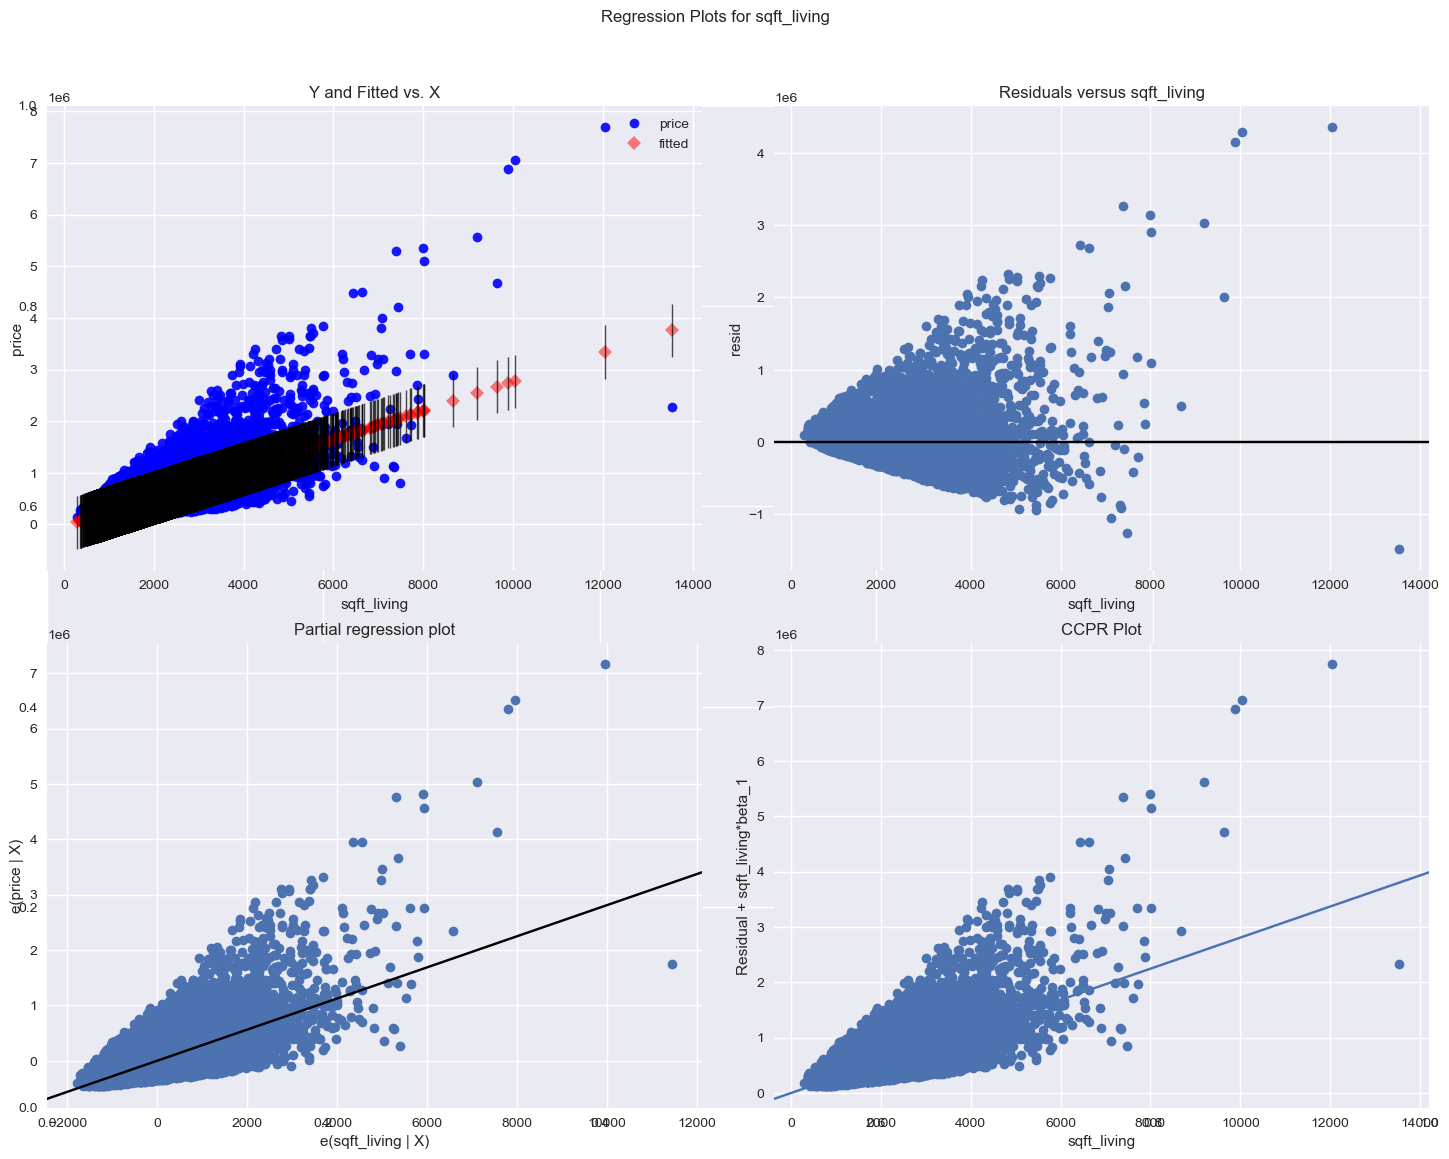

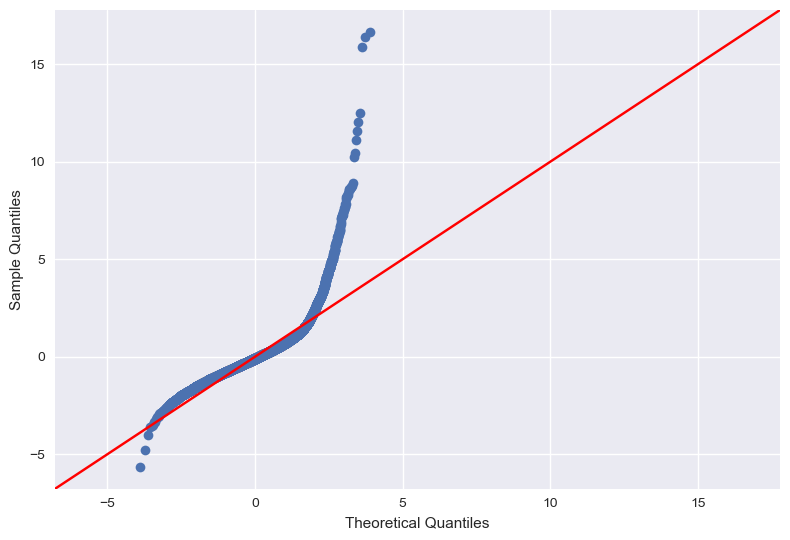

Regression Analysis and Diagnostics for price~sqft_lot
-------------------------------------------------------------------------------------
eval_env: 1


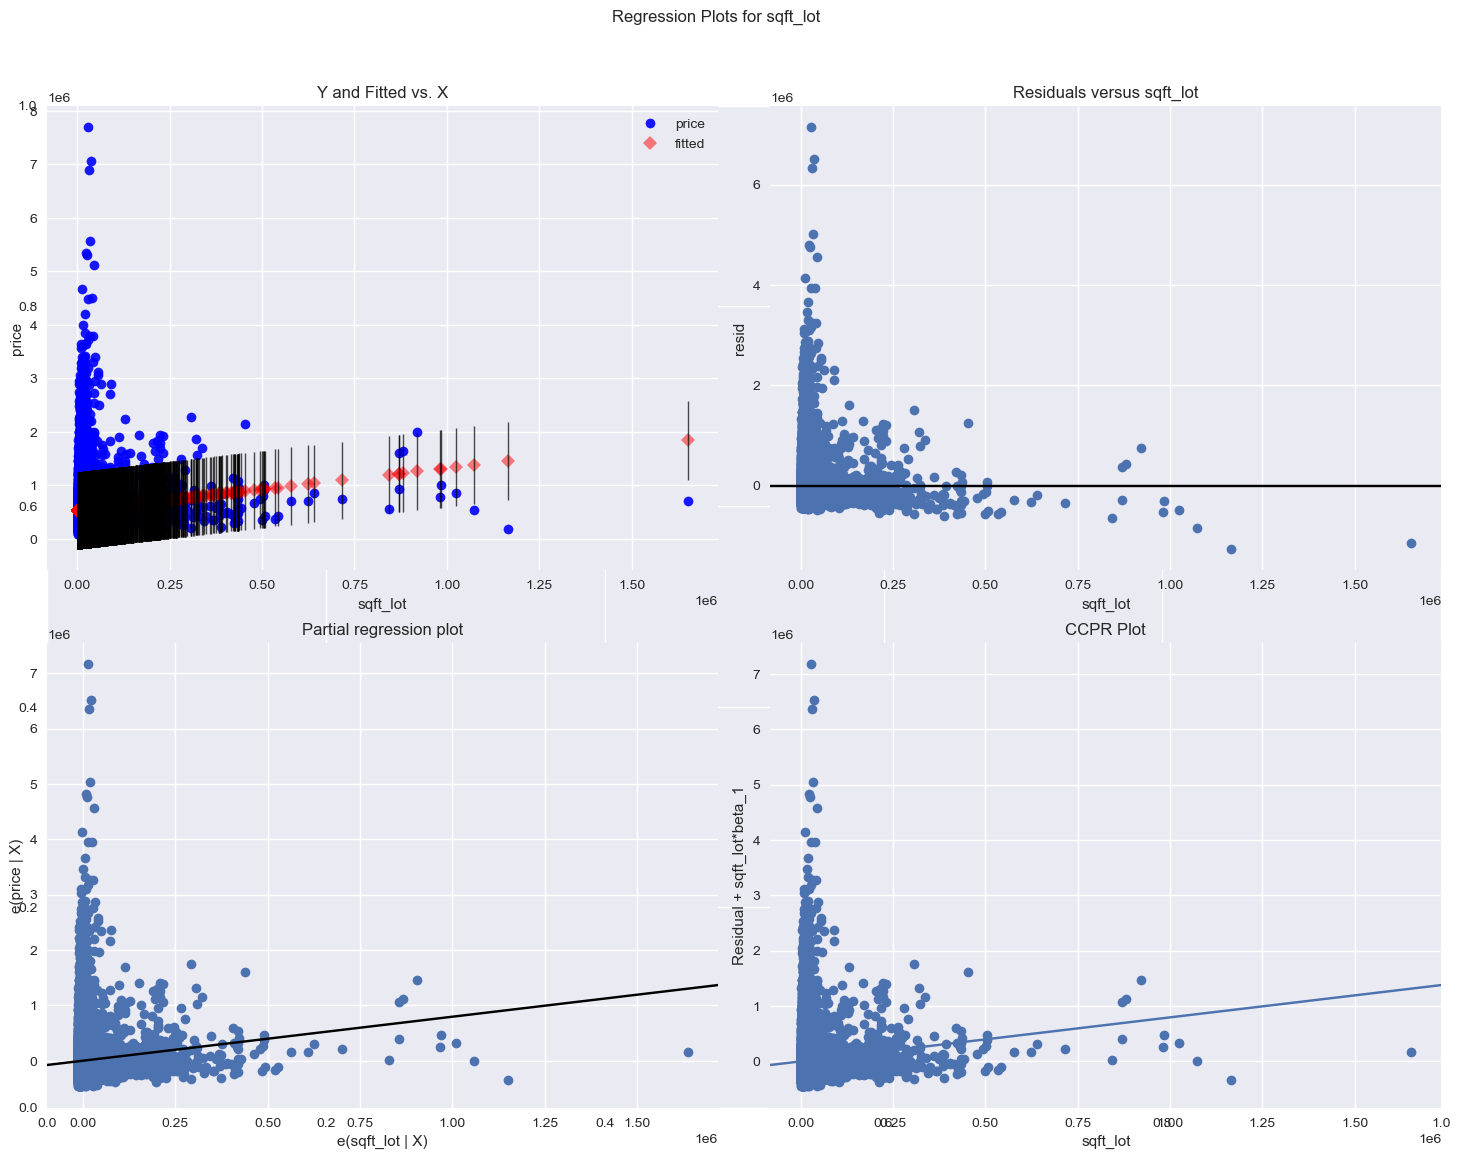

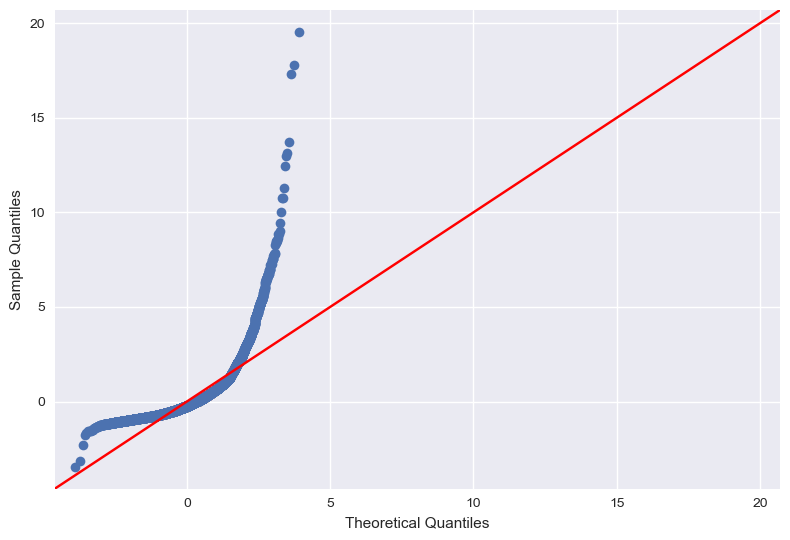

Regression Analysis and Diagnostics for price~floors
-------------------------------------------------------------------------------------
eval_env: 1


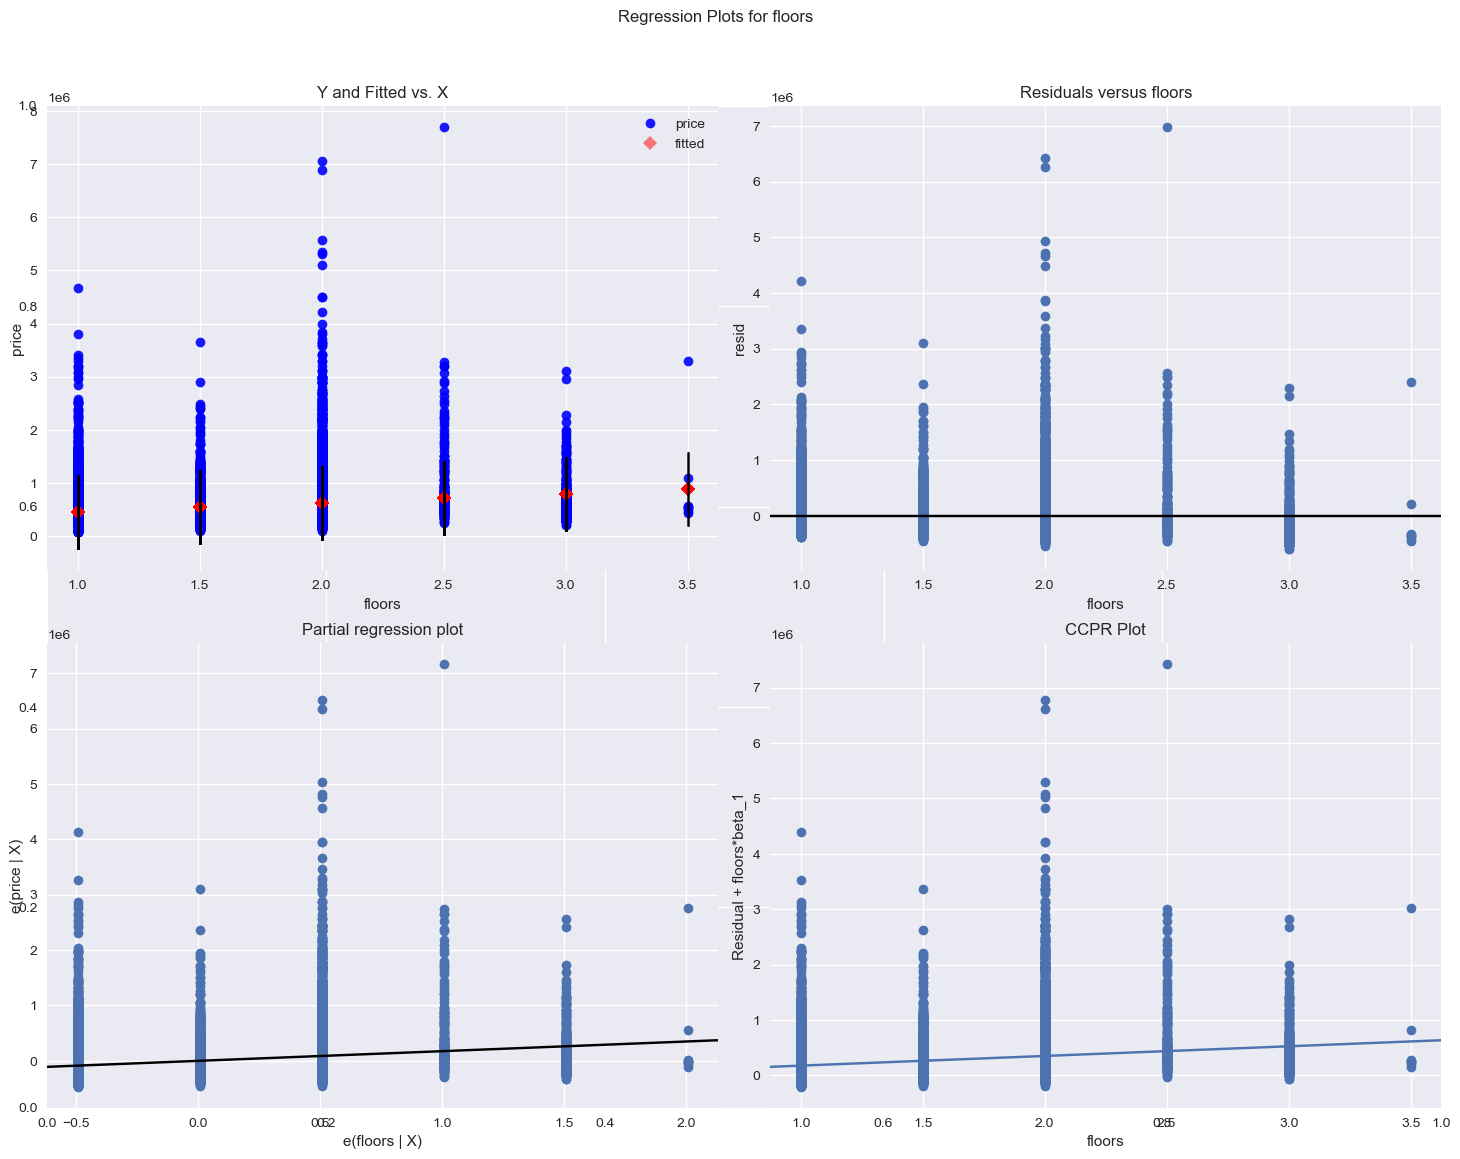

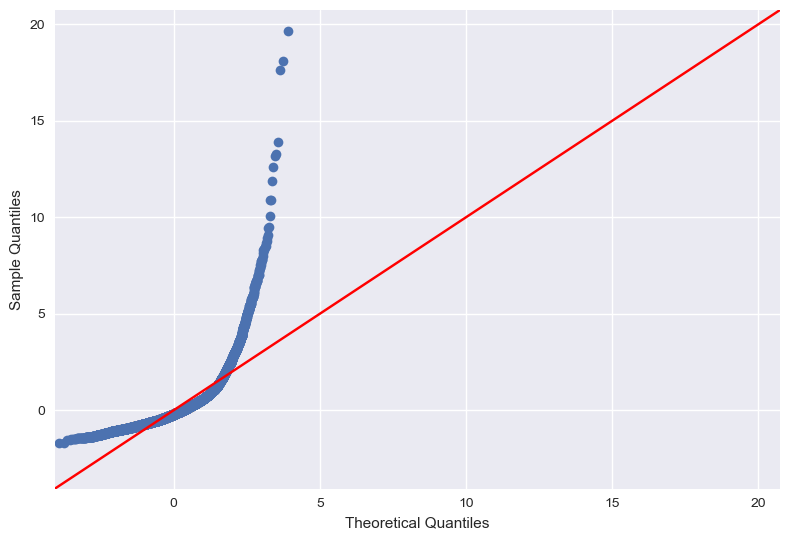

Regression Analysis and Diagnostics for price~waterfront
-------------------------------------------------------------------------------------
eval_env: 1


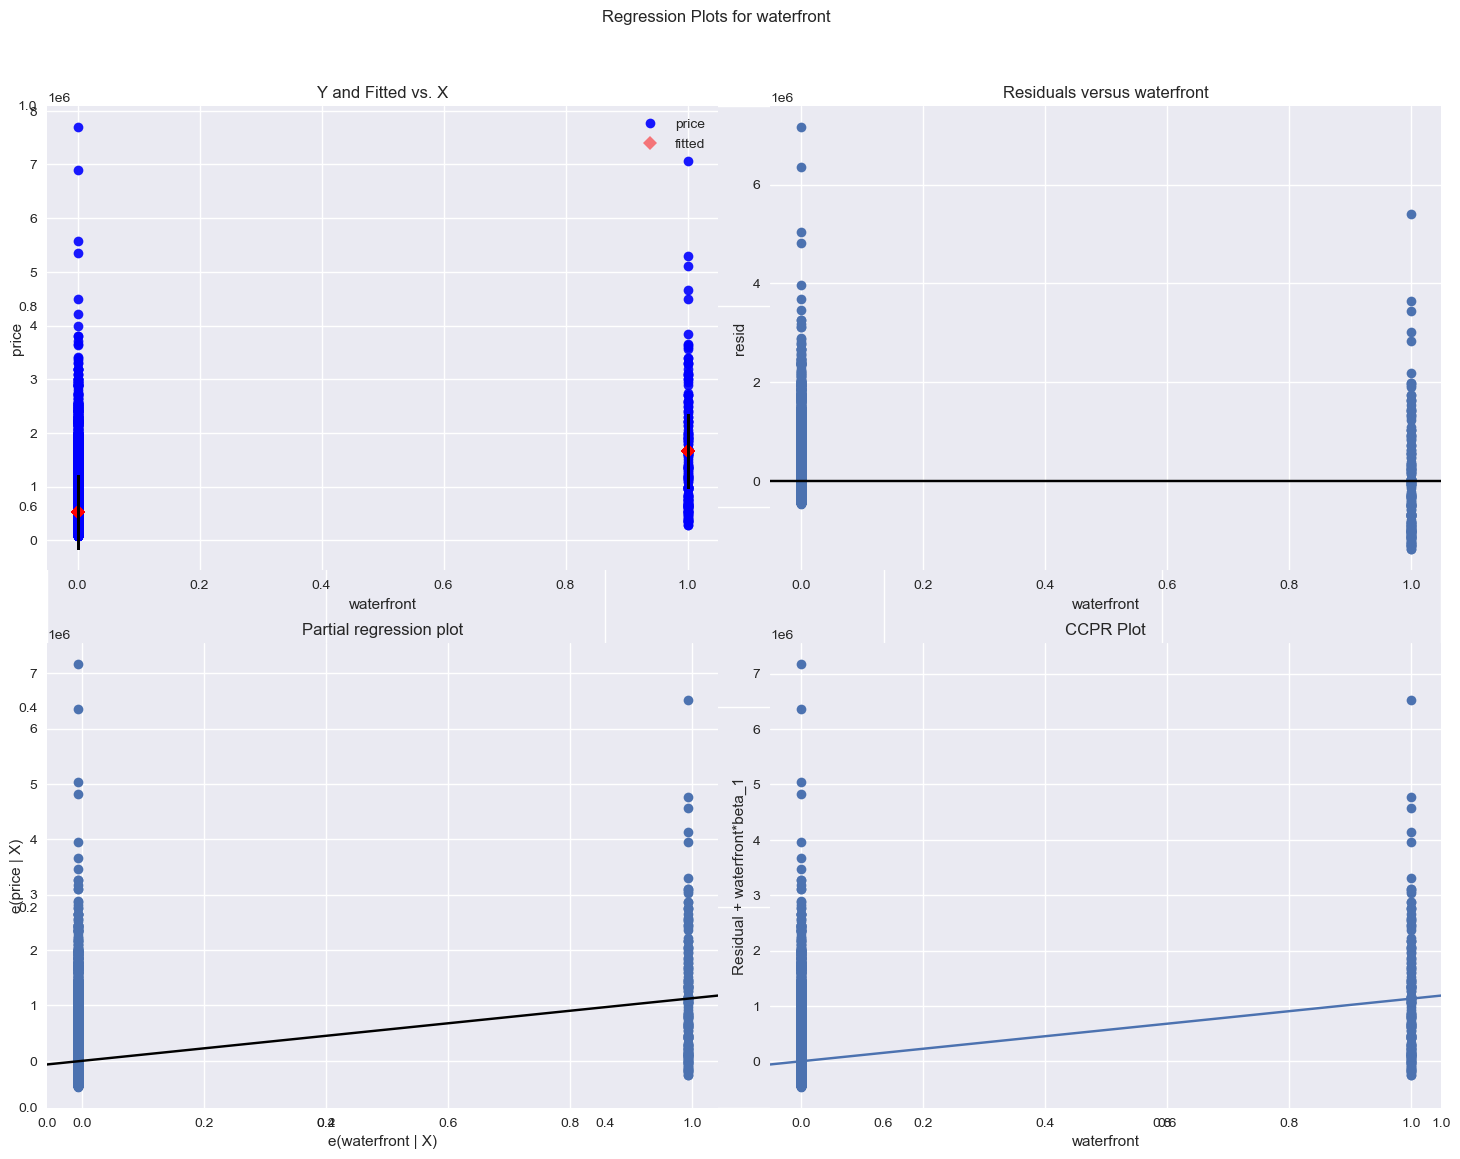

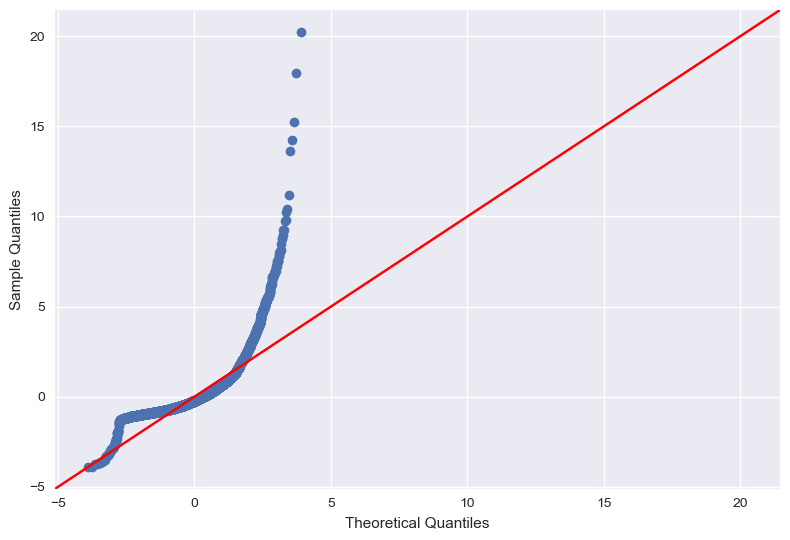

Regression Analysis and Diagnostics for price~view
-------------------------------------------------------------------------------------
eval_env: 1


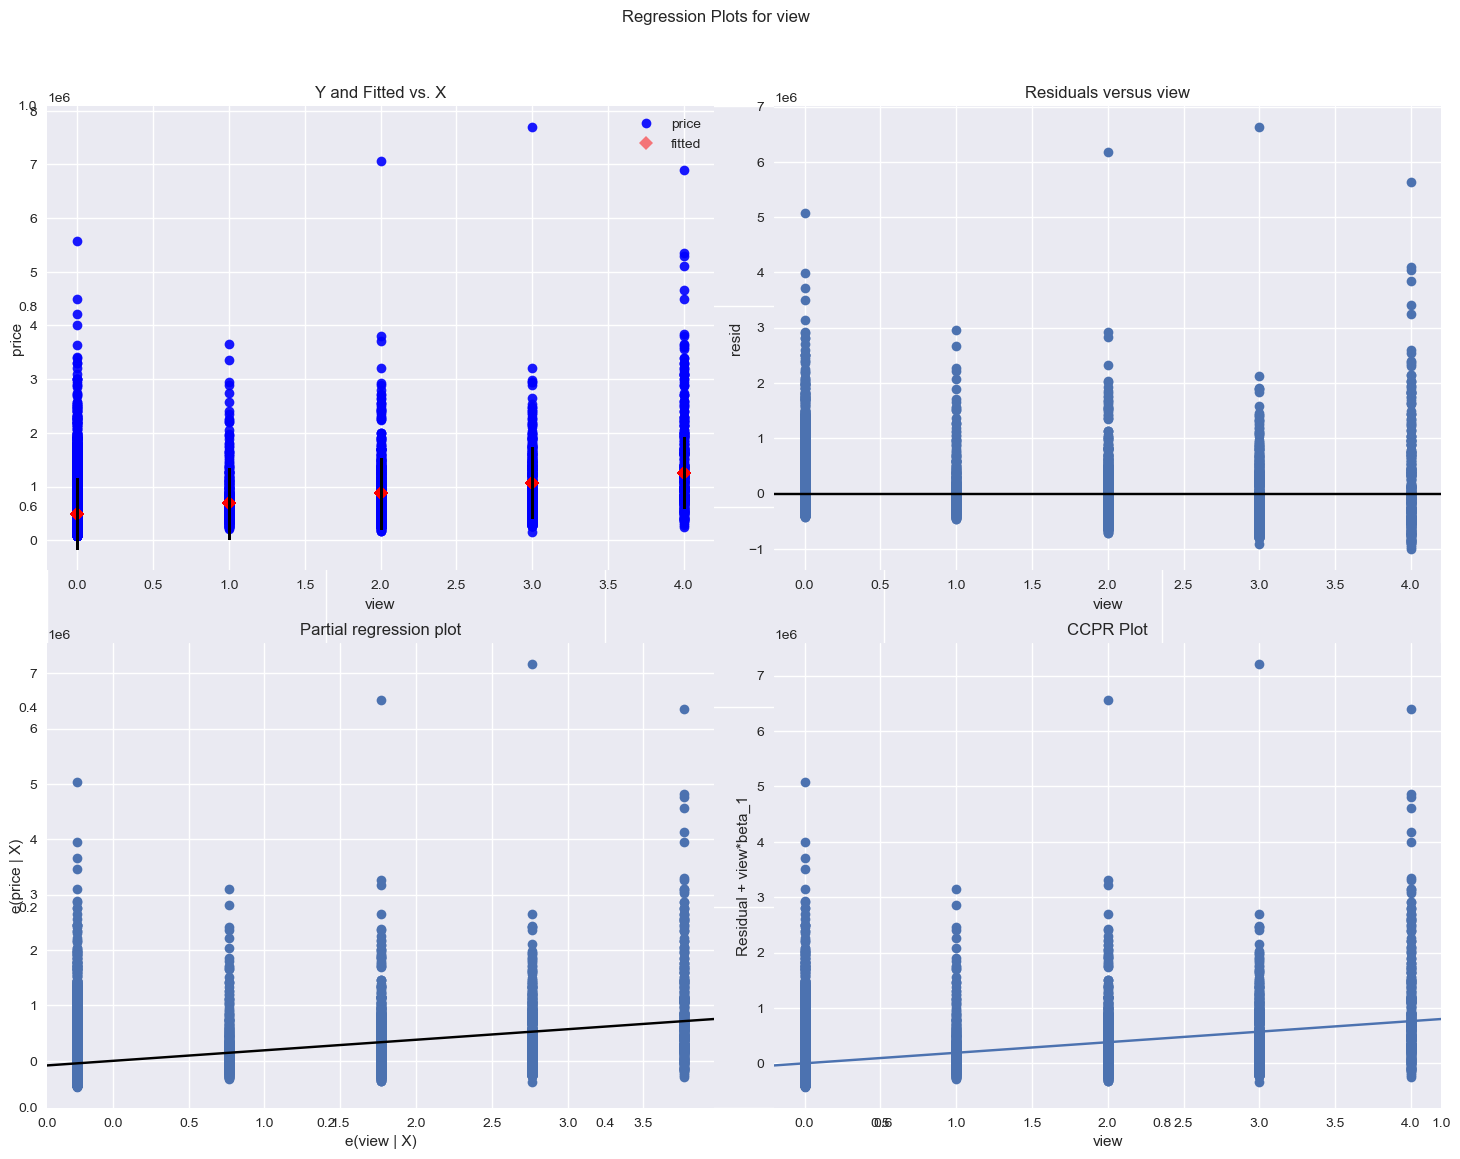

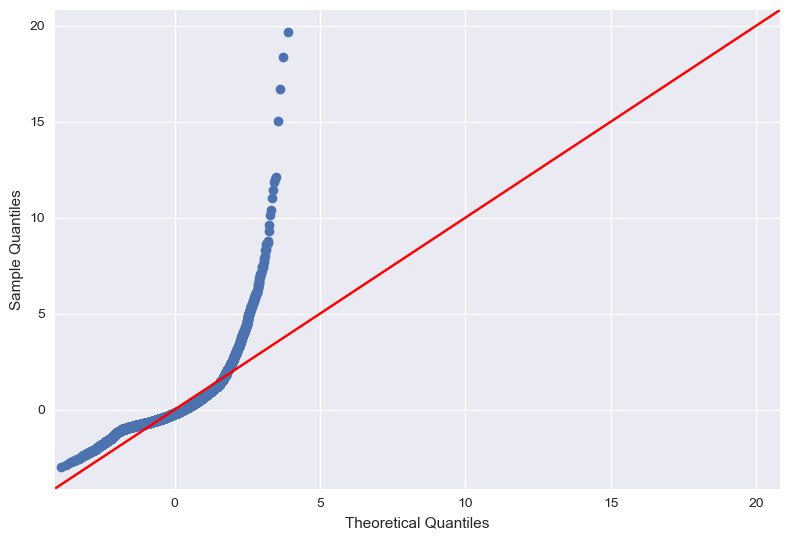

Regression Analysis and Diagnostics for price~condition
-------------------------------------------------------------------------------------
eval_env: 1


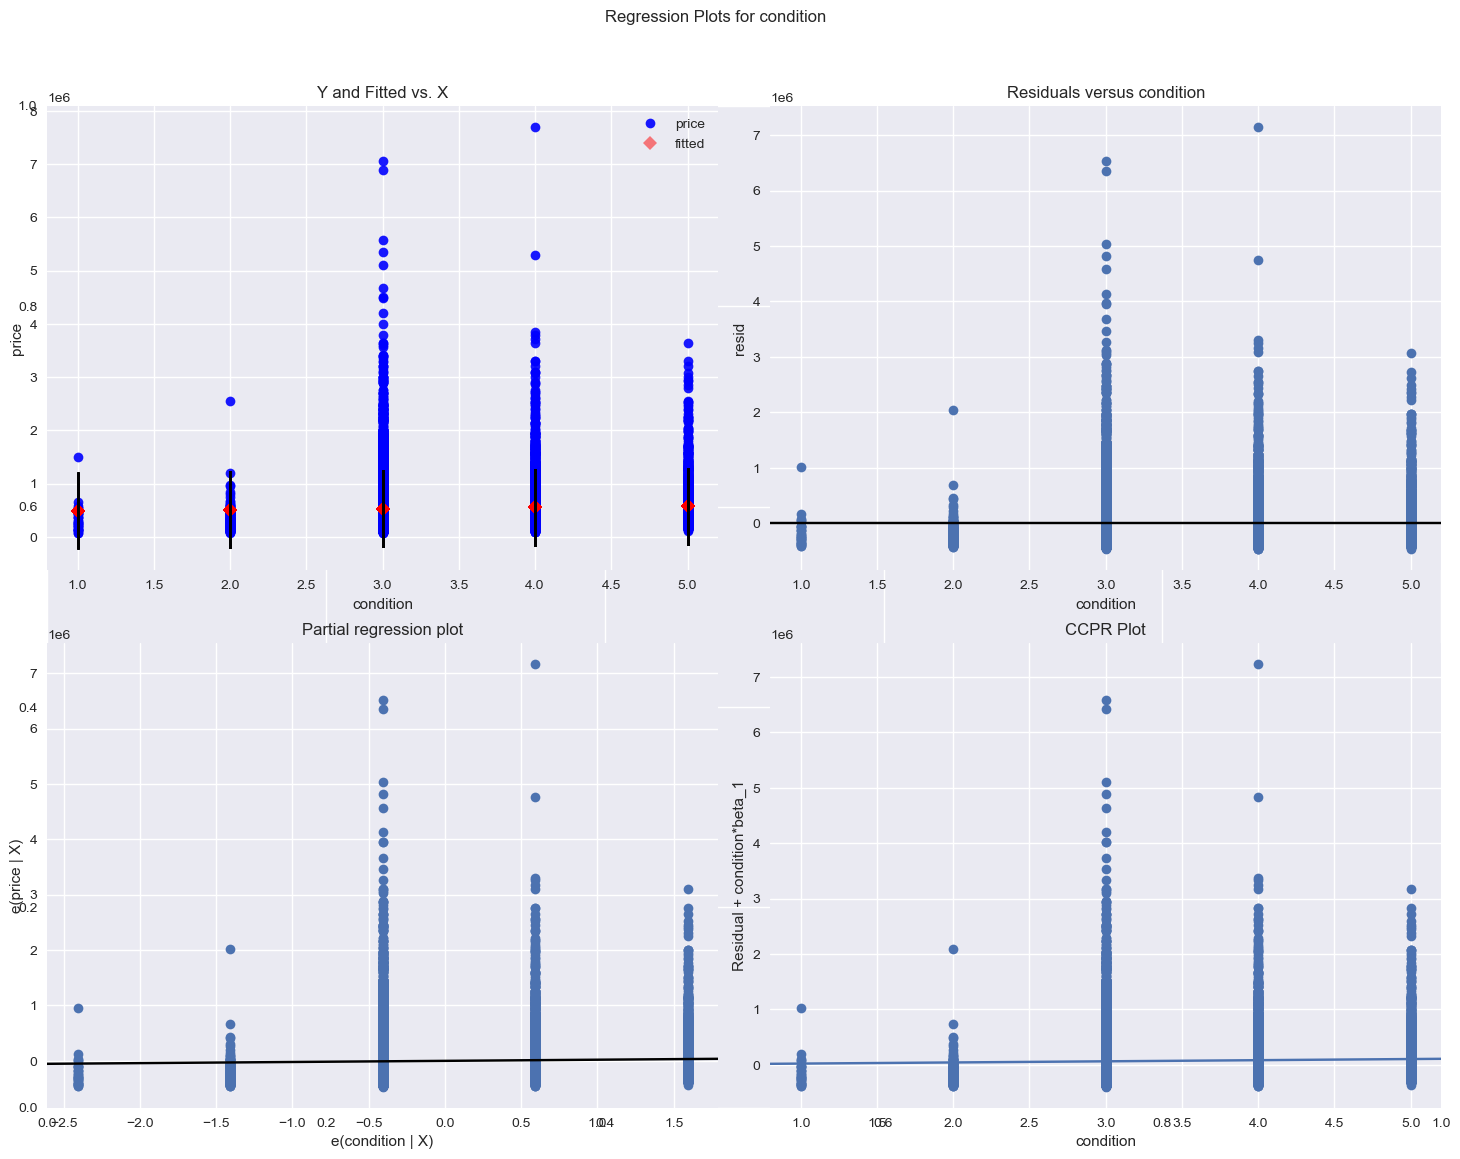

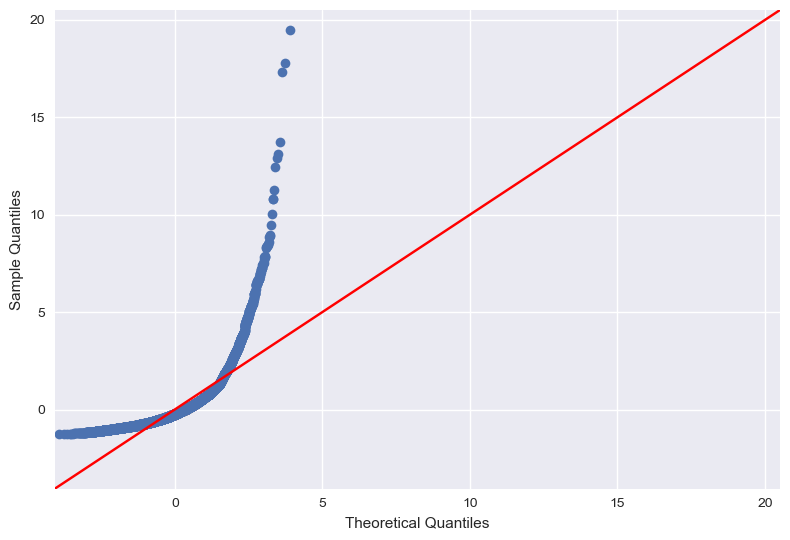

Regression Analysis and Diagnostics for price~grade
-------------------------------------------------------------------------------------
eval_env: 1


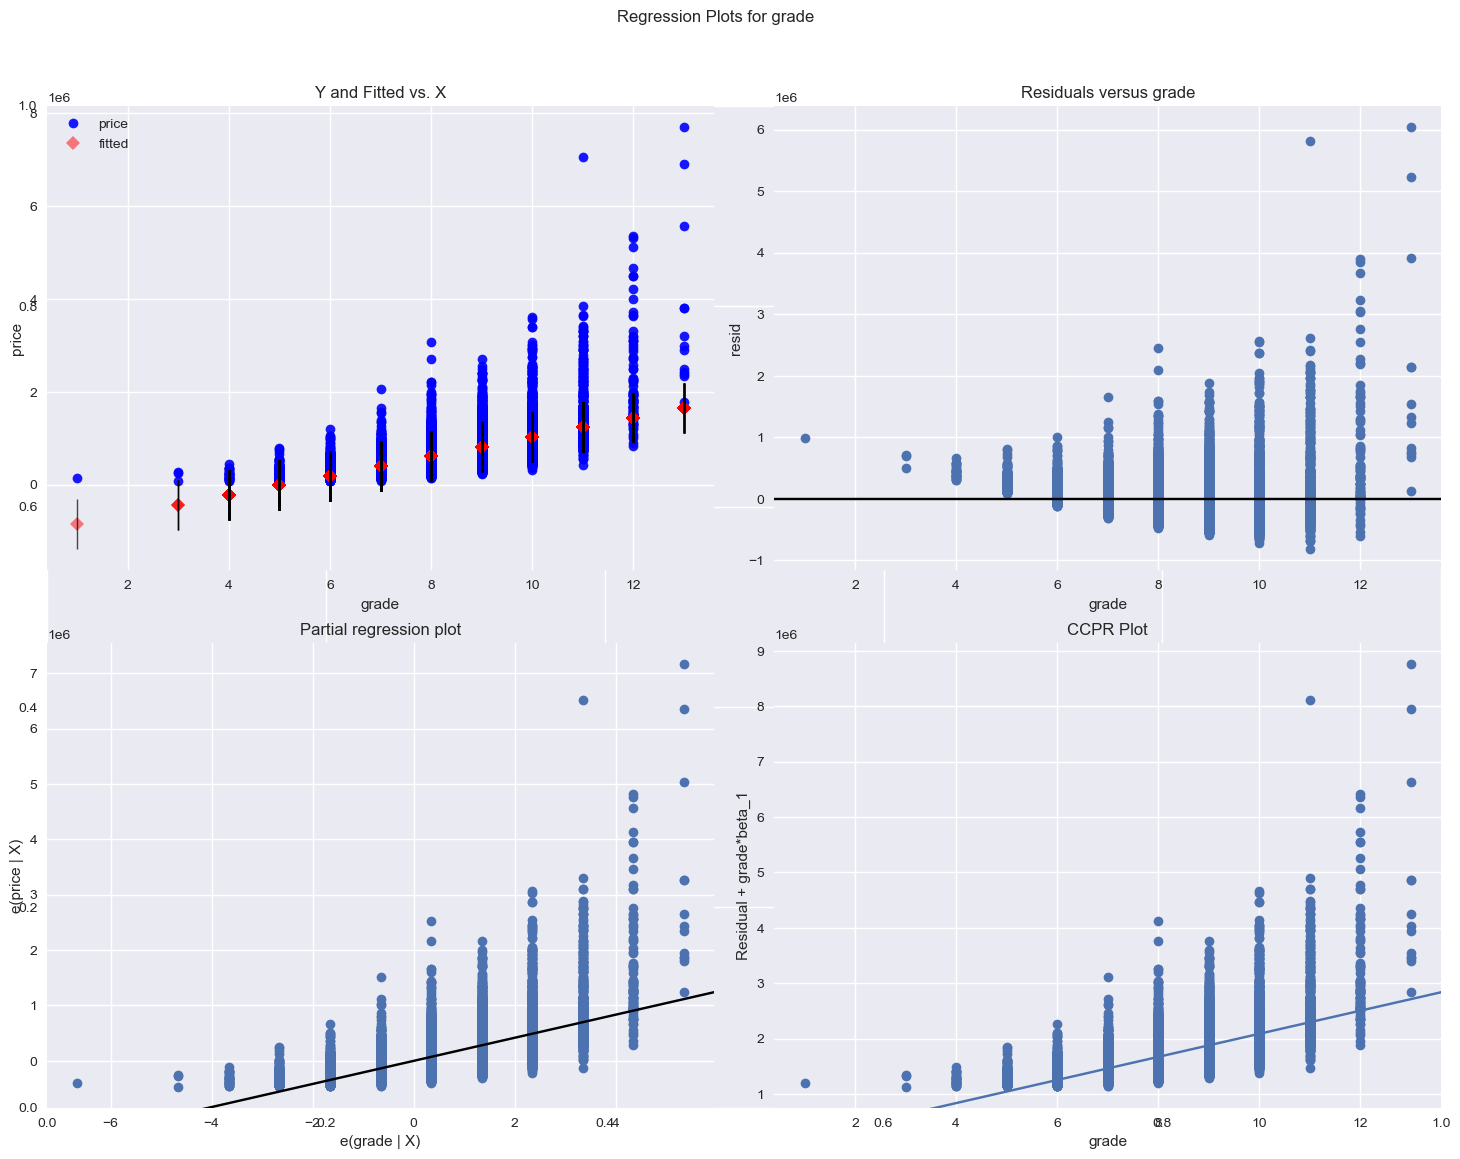

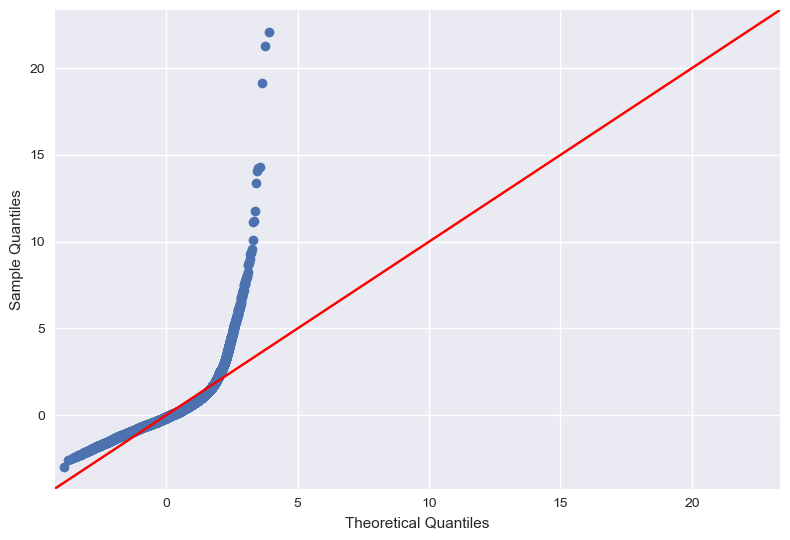

Regression Analysis and Diagnostics for price~sqft_above
-------------------------------------------------------------------------------------
eval_env: 1


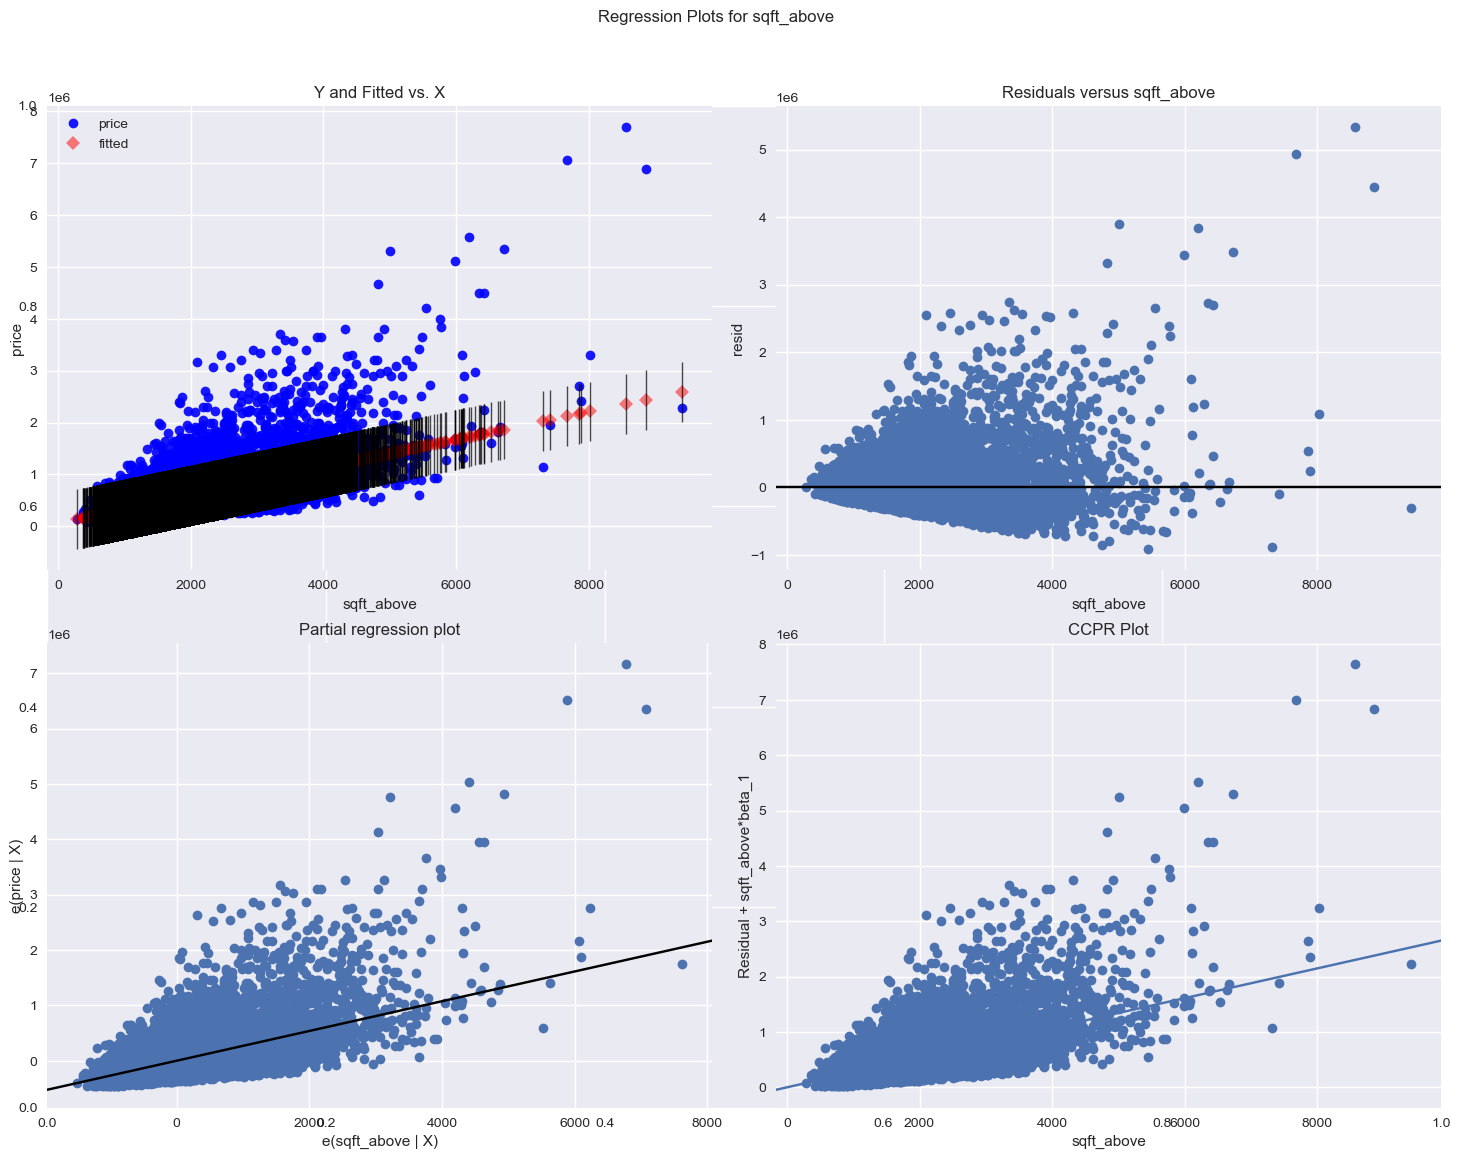

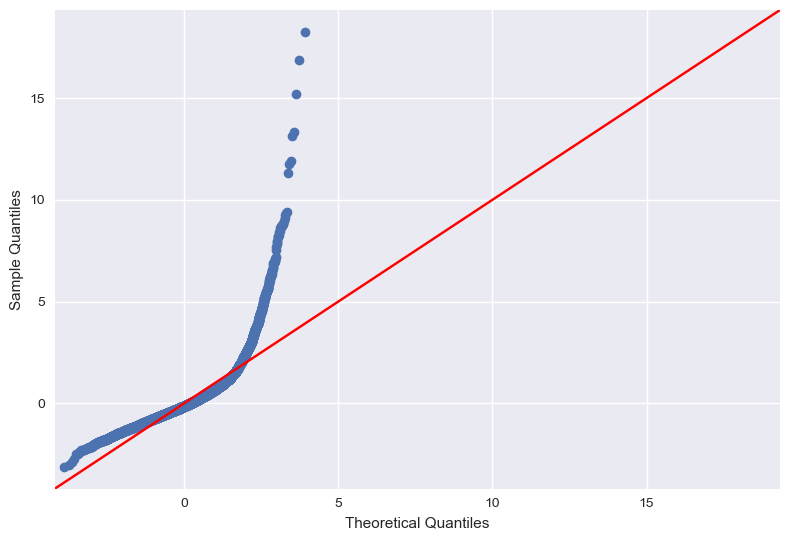

Regression Analysis and Diagnostics for price~sqft_basement
-------------------------------------------------------------------------------------
eval_env: 1


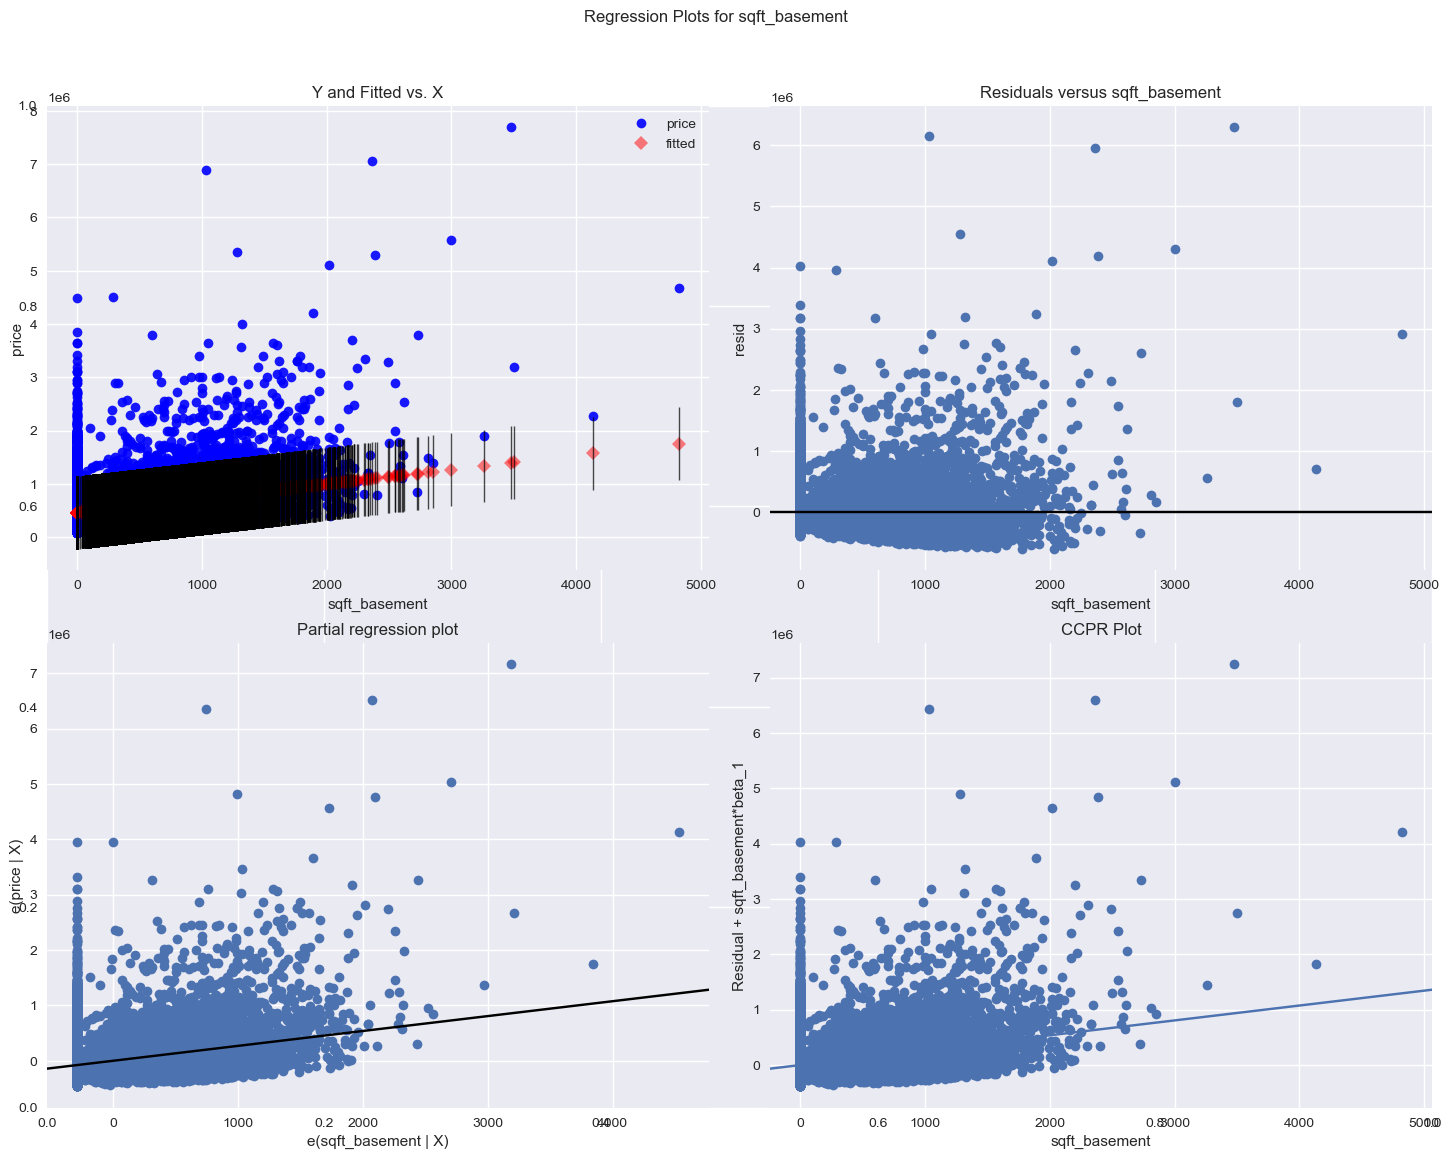

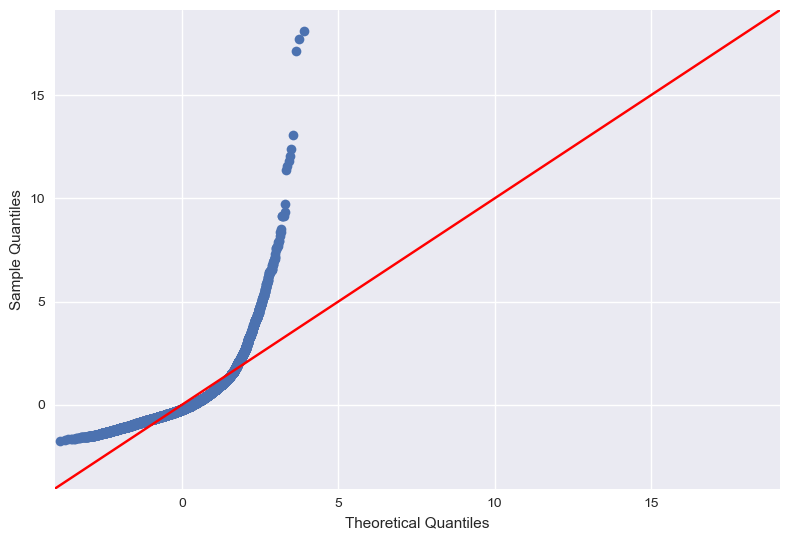

Regression Analysis and Diagnostics for price~yr_built
-------------------------------------------------------------------------------------
eval_env: 1


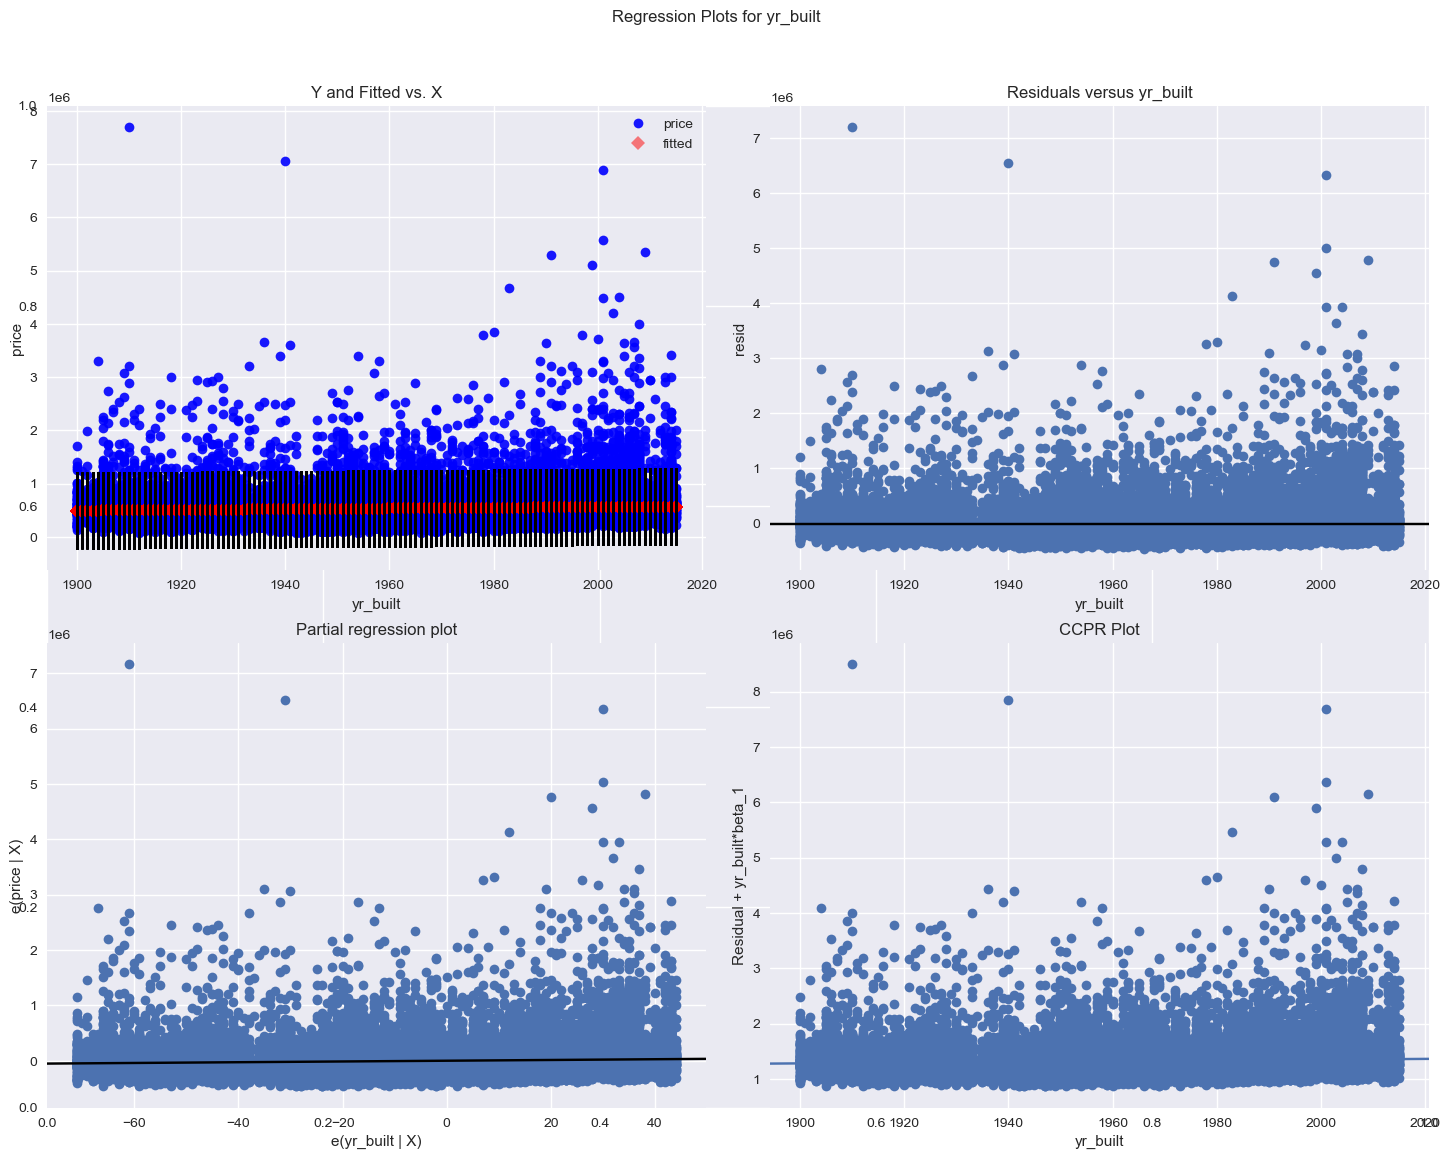

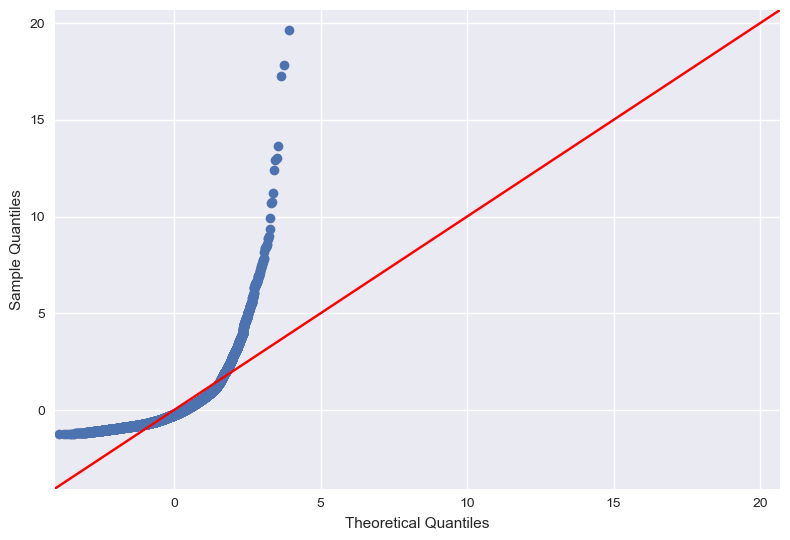

Regression Analysis and Diagnostics for price~yr_renovated
-------------------------------------------------------------------------------------
eval_env: 1


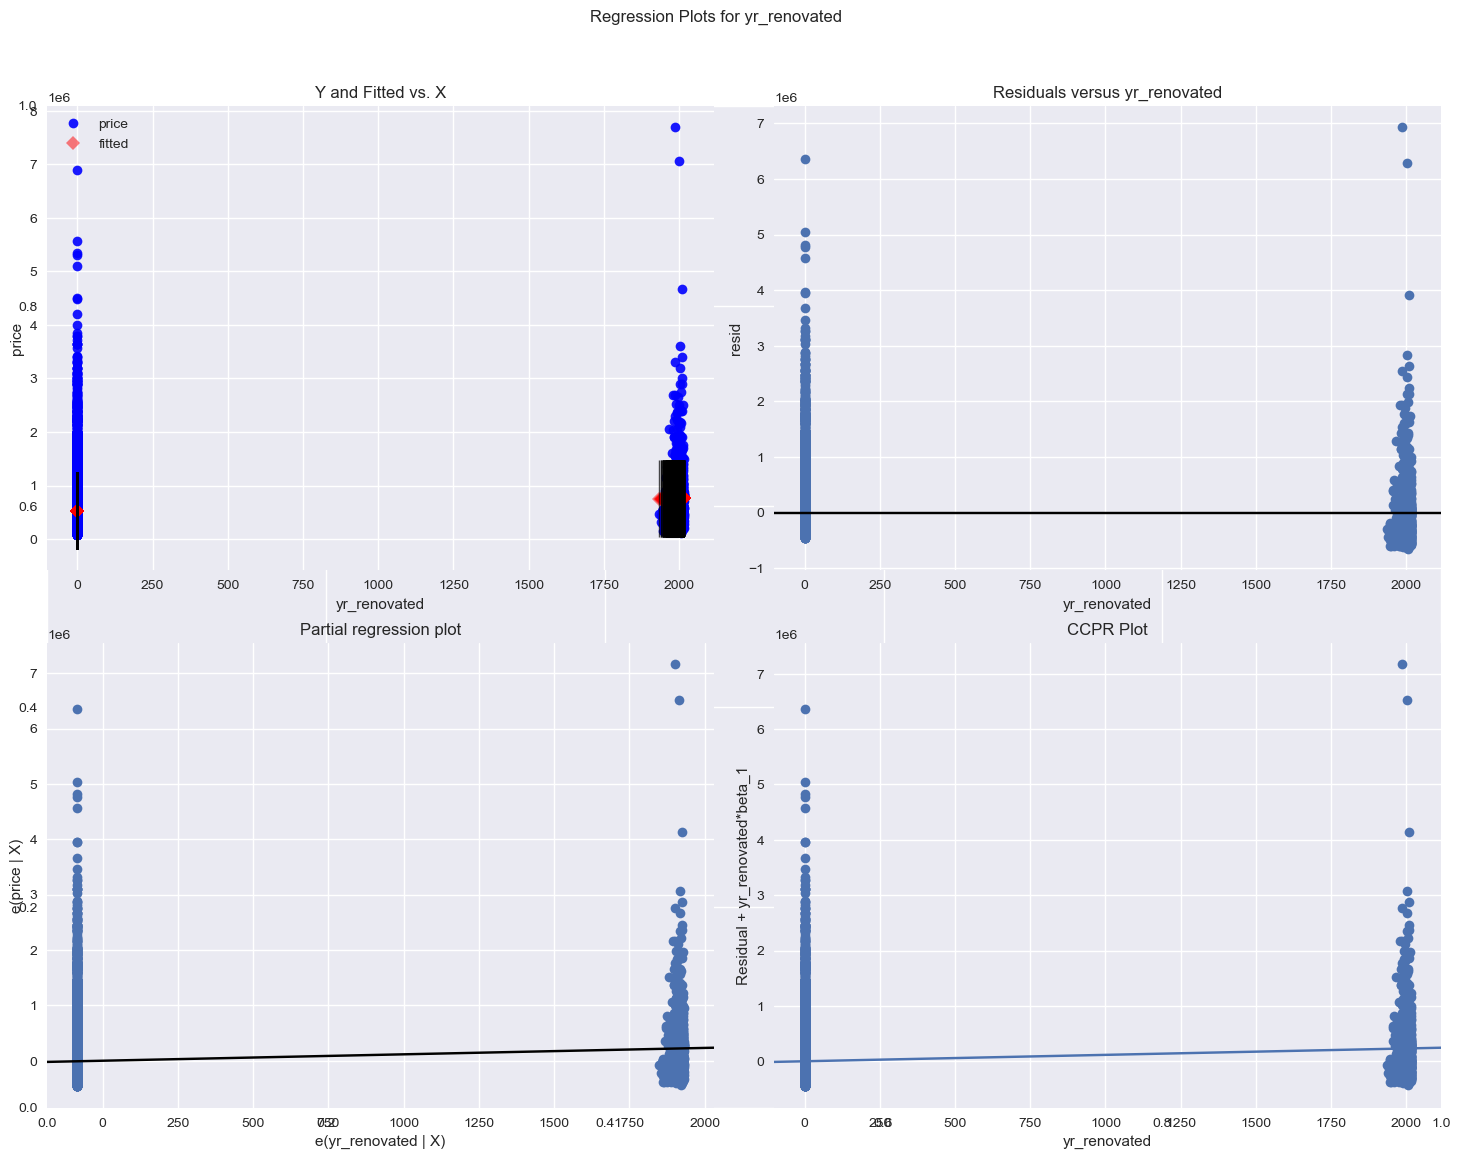

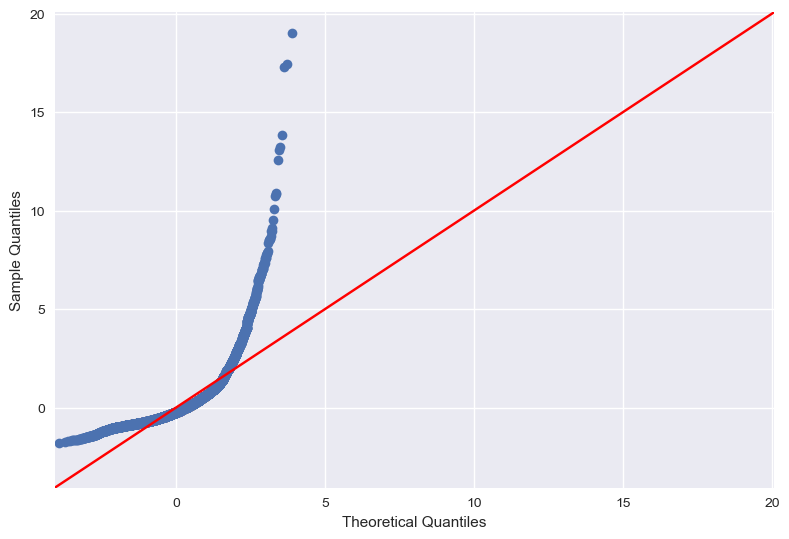

Regression Analysis and Diagnostics for price~sqft_living15
-------------------------------------------------------------------------------------
eval_env: 1


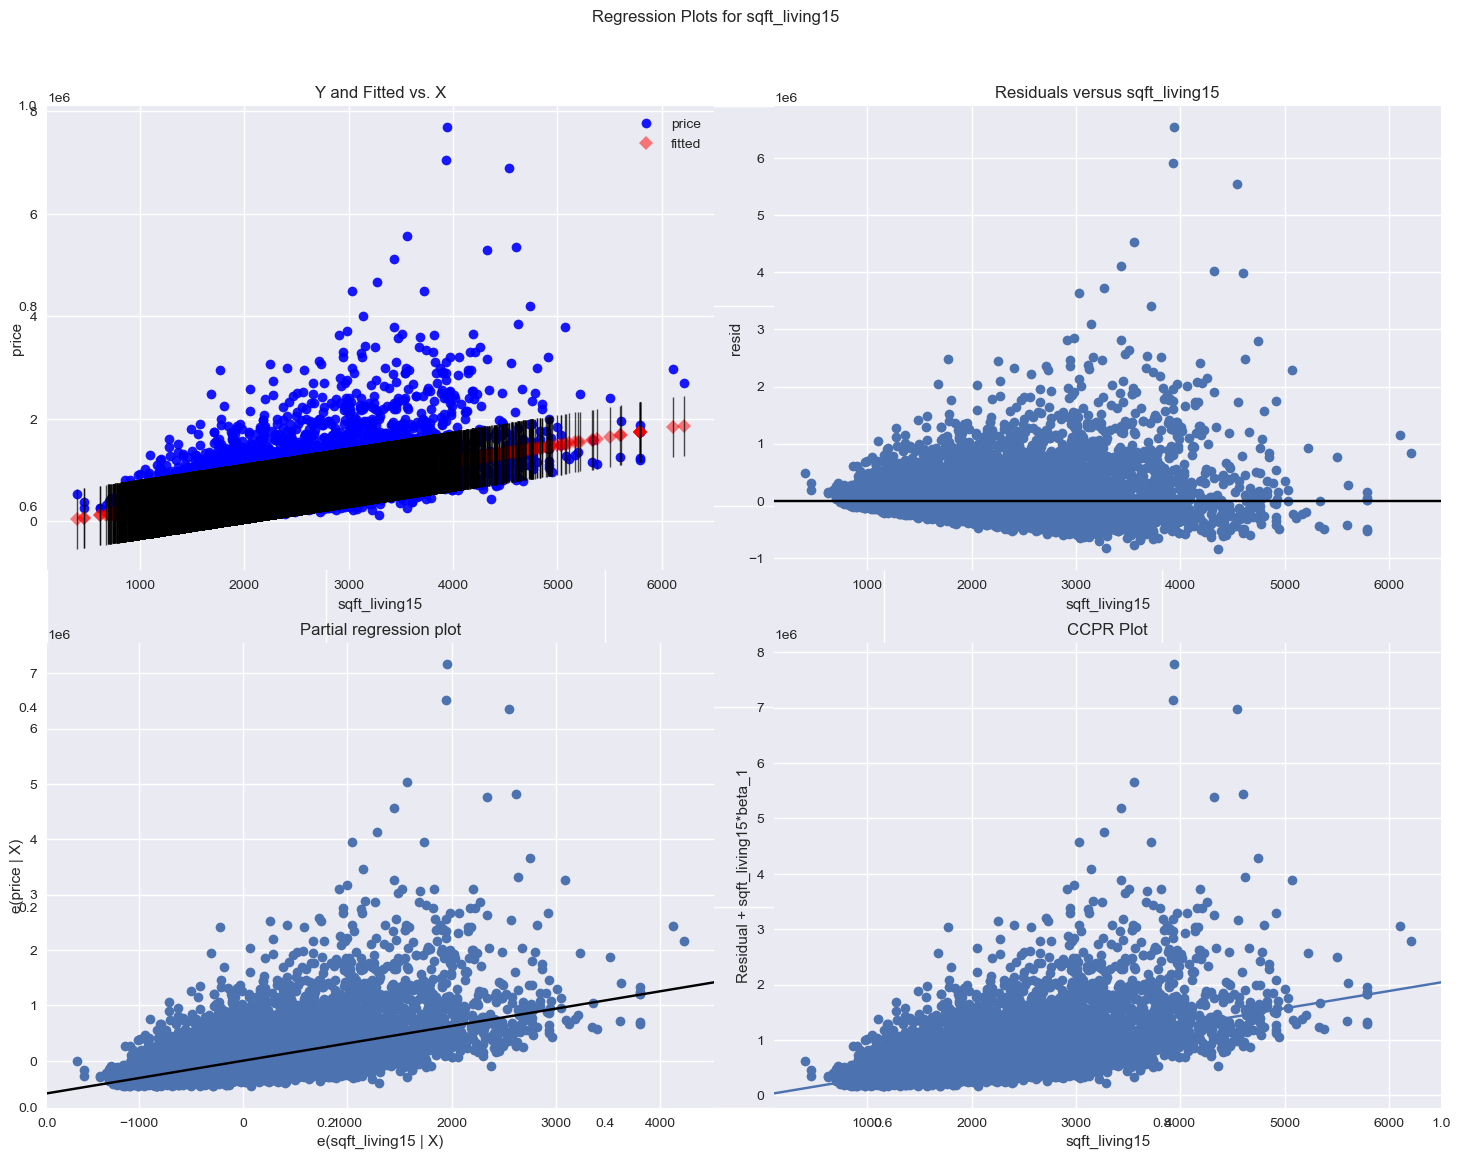

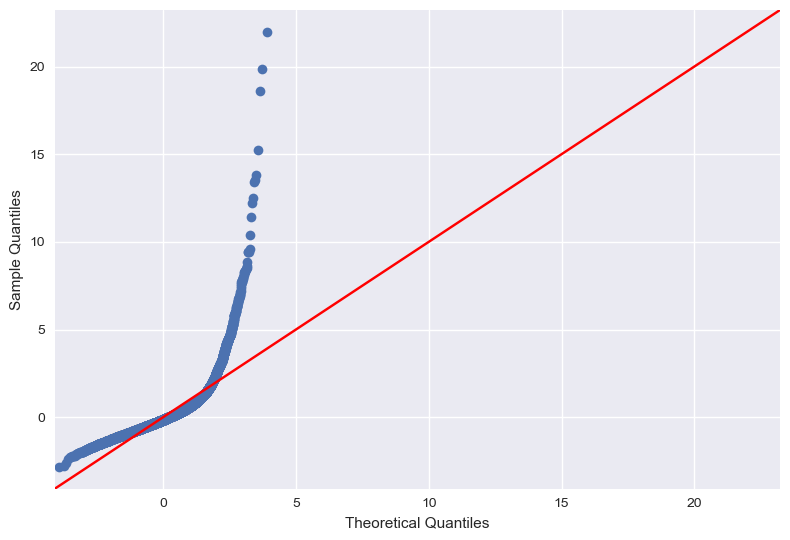

Regression Analysis and Diagnostics for price~sqft_lot15
-------------------------------------------------------------------------------------
eval_env: 1


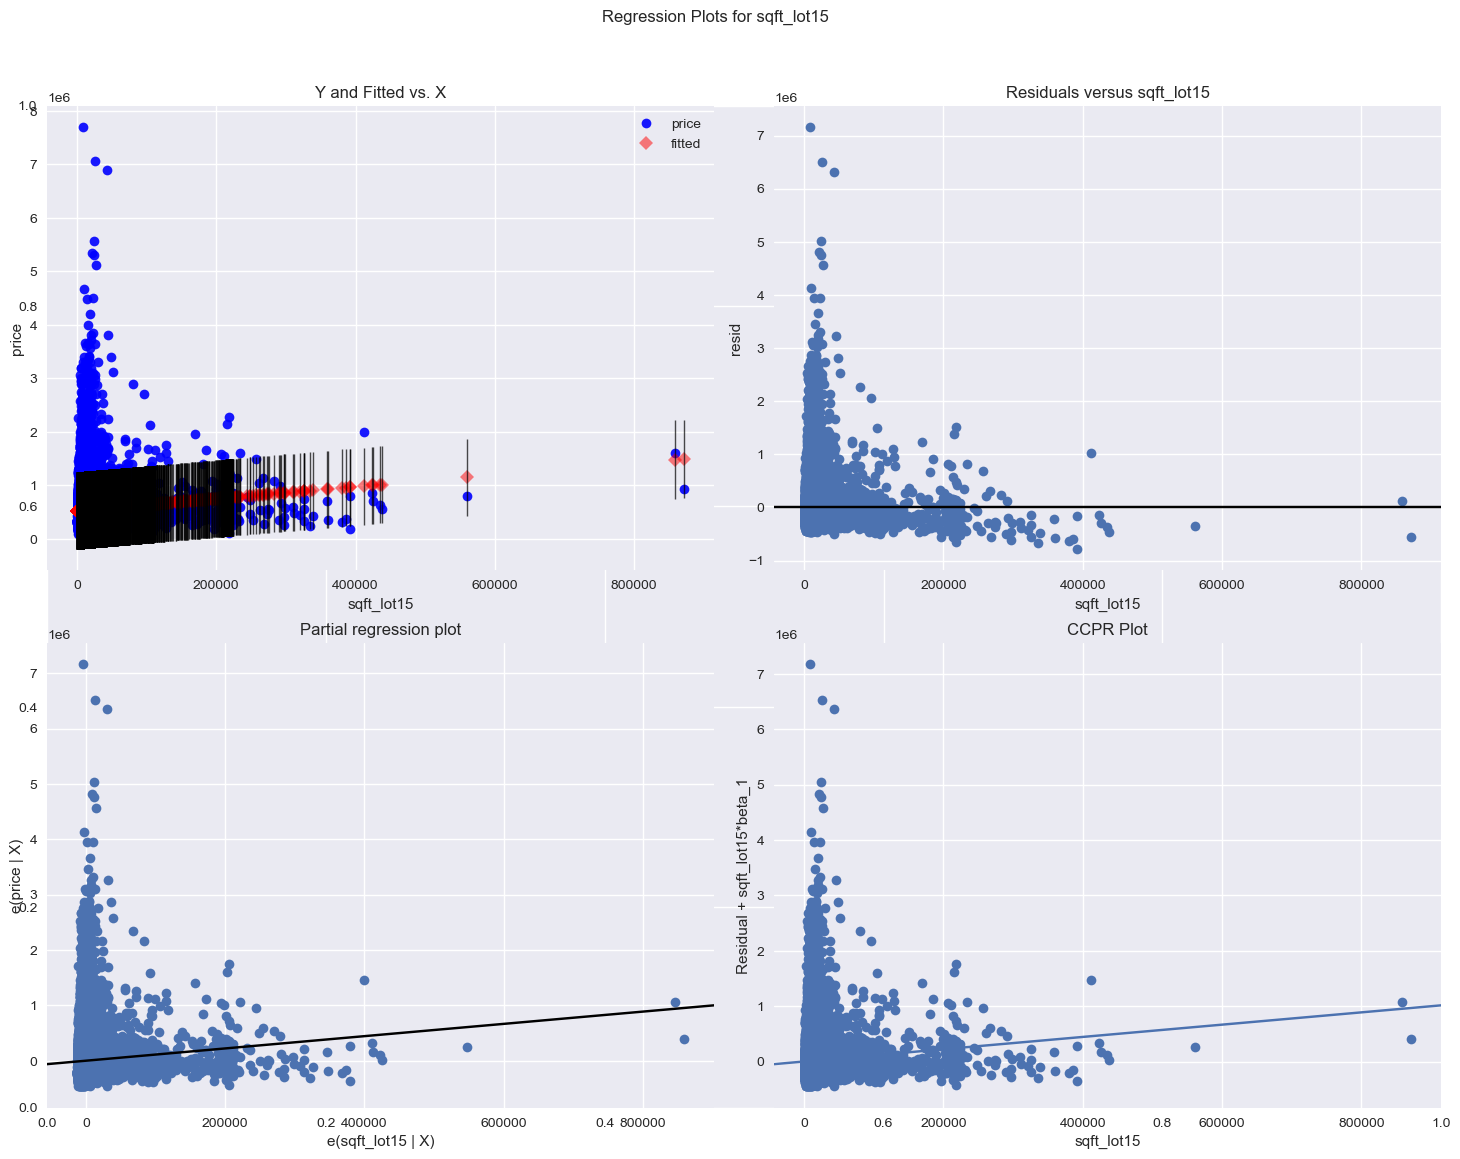

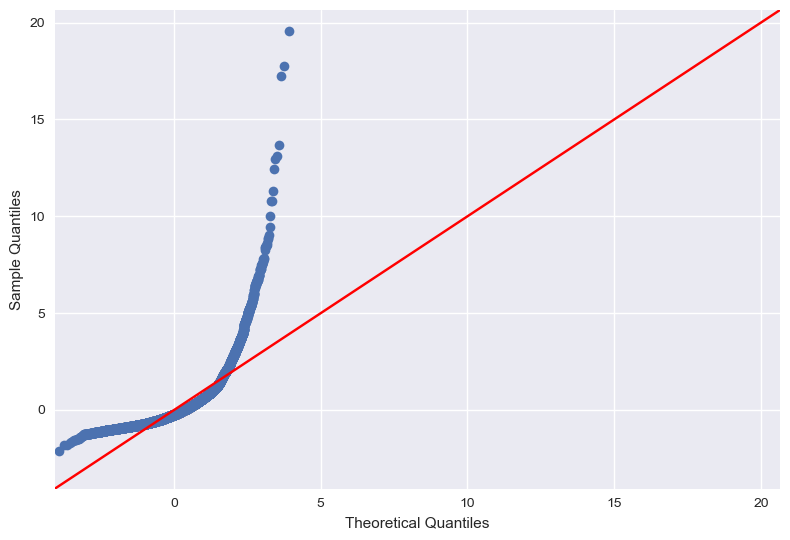

In [49]:
results = []
for idx, column in enumerate(data.columns):
    print (f"Regression Analysis and Diagnostics for price~{column}")
    print ("-------------------------------------------------------------------------------------")

    f = f'price~{column}'
    model = smf.ols(formula=f, data=data).fit()
    
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])

In [50]:
pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ])

,ind_var,r_squared,intercept,slope,p-value,normality (JB)
0,price,1.000000,7.003109e-11,1.000000e+00,0.000000e+00,1.592032e+06
1,bedrooms,0.095073,1.296487e+05,1.217896e+05,0.000000e+00,1.194538e+06
2,bathrooms,0.275766,1.046688e+04,2.504851e+05,0.000000e+00,8.829729e+05
3,sqft_living,0.492865,-4.386760e+04,2.808067e+02,0.000000e+00,5.435339e+05
4,sqft_lot,0.008038,5.281697e+05,7.951601e-01,8.061525e-40,1.147191e+06
5,floors,0.065939,2.791338e+05,1.746950e+05,0.000000e+00,1.255497e+06
6,waterfront,0.070932,5.316534e+05,1.130871e+06,0.000000e+00,9.213256e+05
7,view,0.157884,4.955515e+05,1.904825e+05,0.000000e+00,1.030223e+06
8,condition,0.001324,4.701380e+05,2.054423e+04,8.719407e-08,1.136508e+06
9,grade,0.445507,-1.057041e+06,2.085999e+05,0.000000e+00,2.043215e+06


In [ ]:
#The R-Squared values are generally poor for all independent variables
#Data pre-processing required
#sqft_living with an R-squared score of 0.49 has the highest R-squared score

# Data Preprocessing

In [56]:
df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement',
       'sqft_living15', 'sqft_lot15']].nunique()

price            3625
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
sqft_living15     777
sqft_lot15       8689
dtype: int64

In [ ]:
#Checking For Multicollinearity

In [295]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated',
       'renovated_status'],
      dtype='object')

In [297]:
subset = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement',
        'sqft_living15', 'sqft_lot15']
data_pred = df.loc[:, subset]

In [ ]:
#Correlation Matrix

In [298]:
data_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477610,0.303093,0.391638,0.029244
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685326,0.283770,0.568634,0.087175
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876586,0.435043,0.756420,0.183286
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183510,0.015286,0.144608,0.718557
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523889,-0.245705,0.279885,-0.011269
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072074,0.080588,0.086463,0.030703
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167648,0.276947,0.280439,0.072575
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158202,0.174105,-0.092824,-0.003406
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755917,0.168392,0.713202,0.119248
sqft_above,0.477610,0.685326,0.876586,0.183510,0.523889,0.072074,0.167648,-0.158202,0.755917,1.000000,-0.051963,0.731864,0.194047


In [ ]:
#Return True for positive or negative correlations that are bigger than 0.75 in the correlation matrix:

In [299]:
abs(data_pred.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,True,False,False,False


In [ ]:
#Include stack and zip to create a more robust solution that will return the variable pairs from the correlation matrix that have correlations over .75, but less than 1.

In [300]:
df2 = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df2['pairs'] = list(zip(df2.level_0, df2.level_1))

df2.set_index(['pairs'], inplace = True)

df2.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df2.columns = ['cc']

df2.drop_duplicates(inplace=True)

df2[(df2.cc>.75) & (df2.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876586
"(grade, sqft_living)",0.762704
"(sqft_living15, sqft_living)",0.756420
"(sqft_above, grade)",0.755917
"(sqft_living, bathrooms)",0.754665


In [ ]:
#sqft_above, sqft_living, grade, sqft_living15 and bathrooms show high correlation with each other. Some will be dropped.

# Model 1 OLS Results

In [211]:
df = pd.read_csv('kc_house_data.csv')

continuous = ['price', 'sqft_living','sqft_lot',
        'sqft_living15', 'sqft_lot15']




In [ ]:
#Log Transform and Normalize Continuous Features

In [212]:
# Log transform and normalize
df_cont = df[continuous]

# log features
log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

In [ ]:
# One hot encode categorical Features

In [81]:
bedroom_dummies = pd.get_dummies(df['bedrooms'], prefix='bed', drop_first=True)

In [82]:
bathroom_dummies = pd.get_dummies(df['bathrooms'], prefix='bath', drop_first=True)

In [86]:
floors_dummies = pd.get_dummies(df['floors'], prefix='floor', drop_first=True)

In [84]:
condition_dummies = pd.get_dummies(df['condition'], prefix='cond', drop_first=True)

In [173]:
grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)

In [181]:
preprocessed = pd.concat([df_log_norm, bathroom_dummies,floors_dummies,bedroom_dummies,condition_dummies,bedroom_dummies,df['waterfront'],grade_dummies], axis=1)

In [183]:
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     543.4
Date:                Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:05:38   Log-Likelihood:                -20076.
No. Observations:               21613   AIC:                         4.029e+04
Df Residuals:                   21546   BIC:                         4.082e+04
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4047      0.615     -0.658      0.511      -1.610       0.801
sqft_living_log       0.3603      0.010     36.579      0.000       0.341       0.380
sqft_lot_log         -0.0157      0.011     -1.445      0.148      -0.037       0.006
sqft_living15_log     0.1817      0.007     25.840      0.000       0.168       0.195
sqft_lot15_log       -0.1127      0.011    -10.462      0.000      -0.134      -0.092
bath_0.5             -0.3759      0.420     -0.895      0.371      -1.199       0.447
bath_0.75             0.2948      0.294      1.003      0.316      -0.281       0.871
bath_1.0              0.2466      0.287      0.859      0.391      -0.316       0.809
bath_1.25             0.1938      0.352      0.550      0.582      -0.496       0.884
bath_1.5              0.1448      0.287      0.504      0.614      -0.418       0.708
bath_1.75             0.1953      0.287      0.680      0.496      -0.367       0.758
bath_2.0              0.1872      0.287      0.652      0.515      -0.376       0.750
bath_2.25             0.1453      0.287      0.506      0.613      -0.418       0.708
bath_2.5              0.0251      0.287      0.088      0.930      -0.537       0.588
bath_2.75             0.1511      0.288      0.525      0.599      -0.413       0.715
bath_3.0              0.2228      0.288      0.774      0.439      -0.341       0.787
bath_3.25             0.3237      0.288      1.123      0.261      -0.241       0.889
bath_3.5              0.2845      0.288      0.988      0.323      -0.280       0.849
bath_3.75             0.5015      0.291      1.721      0.085      -0.070       1.073
bath_4.0              0.3905      0.292      1.337      0.181      -0.182       0.963
bath_4.25             0.5377      0.296      1.819      0.069      -0.042       1.117
bath_4.5              0.3827      0.294      1.302      0.193      -0.194       0.959
bath_4.75             0.6389      0.315      2.027      0.043       0.021       1.257
bath_5.0              0.4896      0.318      1.542      0.123      -0.133       1.112
bath_5.25             0.6294      0.336      1.876      0.061      -0.028       1.287
bath_5.5              0.7187      0.350      2.055      0.040       0.033       1.404
bath_5.75             0.6003      0.426      1.410      0.158      -0.234       1.434
bath_6.0              0.9144      0.386      2.369      0.018       0.158       1.671
bath_6.25             0.9990      0.530      1.885      0.059      -0.040       2.038
bath_6.5              0.5018      0.522      0.961      0.336      -0.521       1.525
bath_6.75            -0.1725      0.525     -0.329      0.742      -1.201       0.856
bath_7.5             -0.4724      0.732     -0.646      0.519      -1.907       0.962
bath_7.75             1.8849      0.705      2.672      0.008       0.502

In [159]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [160]:
linreg.coef_

array([ 5.60152831e-01, -3.24249907e-02,  3.04611092e-01, -9.44754670e-02,
       -7.75822522e-01,  5.20380155e-02,  1.02987687e-02,  2.94073535e-01,
       -7.66413429e-02, -4.96850721e-02, -6.45520784e-02, -7.40460048e-02,
       -1.88776665e-01, -3.94009581e-02,  4.04261879e-02,  3.03975122e-01,
        2.44379824e-01,  5.37906310e-01,  4.58817673e-01,  6.36081180e-01,
        4.72046924e-01,  9.17613822e-01,  6.70973606e-01,  8.63680617e-01,
        1.23035689e+00,  1.02680411e+00,  1.45670456e+00,  1.39676610e+00,
        1.04053313e+00,  8.18469734e-01, -6.77687755e-01,  2.72112815e+00,
        1.13414707e+00,  2.89472140e-01,  7.98727686e-03,  4.18192700e-01,
        4.14019658e-01,  5.43006393e-01,  2.93107025e+10,  2.26637903e+11,
       -4.90922223e+10,  1.27033293e+11, -1.06986763e+11, -8.00403559e+10,
        1.52206871e+10,  4.12125583e+09, -6.54958379e+09, -2.02671057e+09,
       -4.01284278e+09,  3.27026059e+08,  1.11039948e-01,  3.65689525e-01,
        4.94316773e-01,  

In [ ]:
#We get an R Squared of 0.625.
#We can iterate the model with some new variables to improve it.

# Model 2 OLS Results

In [ ]:
#Change the yr_renovated column to dispaly whether the house is renovated or not using binary figures.

In [262]:
df['renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [270]:
continuous = ['price', 'sqft_living','sqft_lot',
        'sqft_living15', 'sqft_lot15']


In [271]:
# Log transform and normalize
df_cont = df[continuous]

# log features
log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

In [272]:
preprocessed = pd.concat([df_log_norm, bathroom_dummies,floors_dummies,bedroom_dummies,condition_dummies,bedroom_dummies,df['waterfront'],df['renovated'],grade_dummies], axis=1)

In [273]:
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     550.9
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:58:28   Log-Likelihood:                -19881.
No. Observations:               21613   AIC:                         3.990e+04
Df Residuals:                   21545   BIC:                         4.044e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4487      0.610     -0.736      0.462      -1.644       0.746
sqft_living_log       0.3488      0.010     35.674      0.000       0.330       0.368
sqft_lot_log         -0.0145      0.011     -1.345      0.179      -0.036       0.007
sqft_living15_log     0.1895      0.007     27.142      0.000       0.176       0.203
sqft_lot15_log       -0.1160      0.011    -10.869      0.000      -0.137      -0.095
bath_0.5             -0.3691      0.416     -0.887      0.375      -1.185       0.447
bath_0.75             0.2824      0.291      0.970      0.332      -0.288       0.853
bath_1.0              0.2349      0.285      0.825      0.409      -0.323       0.793
bath_1.25             0.2070      0.349      0.593      0.553      -0.477       0.891
bath_1.5              0.1353      0.285      0.475      0.635      -0.423       0.693
bath_1.75             0.1786      0.285      0.628      0.530      -0.379       0.736
bath_2.0              0.1594      0.285      0.560      0.575      -0.399       0.717
bath_2.25             0.1376      0.285      0.483      0.629      -0.420       0.696
bath_2.5              0.0203      0.284      0.072      0.943      -0.537       0.578
bath_2.75             0.1297      0.285      0.455      0.649      -0.429       0.688
bath_3.0              0.1867      0.285      0.654      0.513      -0.372       0.746
bath_3.25             0.2979      0.286      1.043      0.297      -0.262       0.858
bath_3.5              0.2627      0.285      0.920      0.357      -0.297       0.822
bath_3.75             0.4606      0.289      1.595      0.111      -0.105       1.027
bath_4.0              0.3577      0.289      1.236      0.216      -0.210       0.925
bath_4.25             0.5026      0.293      1.715      0.086      -0.072       1.077
bath_4.5              0.3403      0.291      1.168      0.243      -0.231       0.911
bath_4.75             0.6489      0.312      2.077      0.038       0.037       1.261
bath_5.0              0.4749      0.315      1.509      0.131      -0.142       1.092
bath_5.25             0.5993      0.333      1.802      0.072      -0.053       1.251
bath_5.5              0.6912      0.347      1.994      0.046       0.012       1.370
bath_5.75             0.5087      0.422      1.206      0.228      -0.318       1.335
bath_6.0              0.9108      0.383      2.380      0.017       0.161       1.661
bath_6.25             0.8153      0.525      1.552      0.121      -0.214       1.845
bath_6.5              0.5048      0.517      0.976      0.329      -0.509       1.519
bath_6.75            -0.3356      0.520     -0.645      0.519      -1.355       0.684
bath_7.5             -0.4203      0.725     -0.580      0.562      -1.842       1.001
bath_7.75             1.9420      0.699      2.778      0.005       0.572

In [ ]:
#We get an R Squared of 0.631.
#We can iterate the model with some new variables and improve it further.

# Model 3 OLS Results

In [288]:
continuous = ['price', 'sqft_living','sqft_lot',
        'sqft_living15', 'sqft_lot15','sqft_above']

In [289]:
# Log transform and normalize
df_cont = df[continuous]

# log features
log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

In [290]:
preprocessed = pd.concat([df_log_norm, bathroom_dummies,floors_dummies,bedroom_dummies,condition_dummies,bedroom_dummies,df['waterfront'],df['renovated'],grade_dummies], axis=1)

In [292]:
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     548.8
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:24:08   Log-Likelihood:                -19805.
No. Observations:               21613   AIC:                         3.975e+04
Df Residuals:                   21544   BIC:                         4.030e+04
Df Model:                          68                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.6590      0.608     -1.084      0.278      -1.850       0.532
sqft_living_log       0.4273      0.012     36.703      0.000       0.404       0.450
sqft_lot_log          0.0027      0.011      0.250      0.803      -0.019       0.024
sqft_living15_log     0.1980      0.007     28.326      0.000       0.184       0.212
sqft_lot15_log       -0.1142      0.011    -10.739      0.000      -0.135      -0.093
sqft_above_log       -0.1341      0.011    -12.316      0.000      -0.155      -0.113
bath_0.5             -0.4615      0.415     -1.112      0.266      -1.275       0.352
bath_0.75             0.2500      0.290      0.862      0.389      -0.319       0.819
bath_1.0              0.2243      0.284      0.791      0.429      -0.332       0.780
bath_1.25             0.1390      0.348      0.400      0.689      -0.543       0.821
bath_1.5              0.1124      0.284      0.396      0.692      -0.444       0.668
bath_1.75             0.1443      0.284      0.509      0.611      -0.412       0.700
bath_2.0              0.1332      0.284      0.469      0.639      -0.423       0.689
bath_2.25             0.0934      0.284      0.329      0.742      -0.463       0.650
bath_2.5             -0.0118      0.283     -0.042      0.967      -0.567       0.544
bath_2.75             0.0892      0.284      0.314      0.753      -0.467       0.646
bath_3.0              0.1455      0.284      0.512      0.609      -0.412       0.703
bath_3.25             0.2488      0.285      0.874      0.382      -0.309       0.807
bath_3.5              0.2150      0.284      0.756      0.450      -0.343       0.773
bath_3.75             0.4322      0.288      1.502      0.133      -0.132       0.996
bath_4.0              0.3202      0.288      1.110      0.267      -0.245       0.885
bath_4.25             0.4602      0.292      1.576      0.115      -0.112       1.032
bath_4.5              0.3155      0.290      1.086      0.277      -0.254       0.885
bath_4.75             0.6242      0.311      2.005      0.045       0.014       1.234
bath_5.0              0.4566      0.314      1.456      0.145      -0.158       1.071
bath_5.25             0.5855      0.331      1.767      0.077      -0.064       1.235
bath_5.5              0.6887      0.345      1.994      0.046       0.012       1.366
bath_5.75             0.4840      0.420      1.152      0.250      -0.340       1.308
bath_6.0              0.8751      0.381      2.295      0.022       0.128       1.622
bath_6.25             0.8152      0.523      1.558      0.119      -0.211       1.841
bath_6.5              0.4955      0.516      0.961      0.337      -0.515       1.506
bath_6.75            -0.3780      0.518     -0.729      0.466      -1.394       0.638
bath_7.5             -0.3151      0.723     -0.436      0.663      -1.732

In [ ]:
#We get an R Squared of 0.634.
#The model can be used to explain or predict 63.4% of final house prices using the selected independent variables.
#The three best predictors for the sale price of a house are square footage of the living area, number of bathrooms/bedrooms and condition of the house

# Conclusion

In [ ]:
#The final model has an adjusted R-squared value of 0.634. 
#With adjustments to the categorical variables and the continuous variables we can more accurately predict our dependent variable 'price'.
#For the continuous variables, we applied log transformations to the continuous data for them to appear more normal. 
#Normalization was also applied to reduce the effect of outliers and reduce the values to be between 0-1. 
#To handle categorical variables we used one hot encoding.
#The three best predictors for the sale price of a house are square footage of the living area, number of bathrooms/bedrooms and condition of the house

# Recommendations

In [ ]:
#To increase the sale price of a house, we can;
#1. Increase the amount of bathrooms 
#2. Increase the number of bedrooms of the property 
#3. Renovate the property to help improve the condition of the house. 